### Задача 1. Numpy (15 баллов)

**3.1 (Вспоминаем, что такое numpy)** (3 балла)


In [1]:
import numpy as np
import time # понадобится для замера времени в следующих пунктах

$ 1.$ (1 б.)

Создайте с помощью np.random.randint numpy массив из 20-ти рандомных чисел.
Посчитайте с помощью методов numpy и выведите на экран:

* среднее значение в массиве
* минимальное значение в массиве
* максимальное значение в массиве
* индекс минимального элемента в массиве


In [2]:
a = np.random.randint(0,100, size=20)
print(a)

[11  7 97 43 79  6 47 67  0 15 94 36 56 26 92 28 18 69 11 73]


In [3]:
print(f'Среднее значение: {a.mean()}') #1
print(f'Минимальное значение: {a.min()}') #2
print(f'Минимальное значение: {a.max()}') #3
print(f'Индекс минимального элемента в массиве: {a.argmin()}') #4

Среднее значение: 43.75
Минимальное значение: 0
Минимальное значение: 97
Индекс минимального элемента в массиве: 8


$ 2.$ (1 б.)Создайте два numpy массива: в первом должны быть четные числа от 2 до 14 включительно, а во втором — числа 7, 11, 17, 18, 23, 30, 45.

* Сложите массивы и возведите элементы получившегося массива в квадрат
* Выведите все элементы из первого массива, которые стоят на тех местах, где элементы второго массива больше 12 и дают остаток 3 при делении на 5.
* Для первого массива найдите остатки от деления на 2, а для второго — на 3.

In [4]:
a = np.arange(2, 15, 2)
b = np.array([7, 11, 17, 18, 23, 30, 45])

In [5]:
c = np.power((a + b), 2) #1
print(c)

[  81  225  529  676 1089 1764 3481]


In [6]:
print(c[(b > 12)&(b%5 == 3)]) #2

[ 676 1089]


In [7]:
print(a%2) #3
print(b%3)

[0 0 0 0 0 0 0]
[1 2 2 0 2 0 0]


$ 3.$ (1 б.)
1. Сгенерируйте рандомный массив b размера 3x1.
2. Сгенерируйте матрицу С размера 3x3.
3. Решите систему Cx = b с помощью numpy.linalg.solve
4. Подумайте/погуглите, в каком случае numpy.linalg.solve вернет ошибку LinAlgError. Воспроизведите этот случай.

In [8]:
b = np.random.rand(3,1) #1
C = np.random.rand(3,3) #2
print(b)
print(C)

[[0.14930022]
 [0.60016948]
 [0.56437389]]
[[0.71129225 0.27248735 0.8847452 ]
 [0.17246919 0.77149653 0.62120583]
 [0.59709888 0.22897954 0.29358036]]


In [9]:
np.linalg.solve(C,b) #3

array([[ 0.90293363],
       [ 1.36261571],
       [-0.97682928]])

In [10]:
C = np.array([[1, 2], [2, 4]]) #4 необратимая матрица, у которой второя строка является удвоенной первой строкой
b = np.array([3, 6])
np.linalg.solve(C,b)

LinAlgError: Singular matrix

**3.2 (12 баллов)**

Сравните производительность операций умножения матриц с использованием библиотеки NumPy и стандартных списков Python для матриц размером от 2x2 до 100x100.

1. Сгенерируйте две матрицы A и B случайного размера от nxn, заполненные случайными целыми числами от 1 до 50. **(1 балл)**
2. Используя библиотеку NumPy, выполните умножение матриц A и B. Измерьте время выполнения операции. **(1 балл)**
3. Реализуйте функцию для умножения матриц с помощью стандартных списков Python. Измерьте время выполнения этой операции.  **(2 балла)**
4. Сделайте вышеперечисленные пункты для n=2,...100. **(3 балла)**
5. Для какого-нибудь n проверьте, что результаты умножения (получившаяся матрица) совпадают. **(1 балл)**


6. Постройте график, где по оси X будет размер матрицы, по оси Y - время выполнения операции. Постройте два графика (для numpy и для стандартных списков)  **(4 балла)**
Сделайте выводы.


In [11]:
#nxn = 3x3
A = np.random.randint(1,50,(3,3))
B = np.random.randint(1,50,(3,3))

In [12]:
start = time.time()
mult = np.dot(A,B)
end = time.time()
ex = end - start
print(mult)
print(ex)

[[1809 1618 3926]
 [ 510  566 1366]
 [1245 1135 2965]]
0.0005979537963867188


In [13]:
def m_m(A, B):
    
    if len(A[0]) != len(B):
        print('Error')
    else:
        res = [[0 for o in range(len(B[0]))] for o in range(len(A))]
        for i in range(len(A)):  
            for j in range(len(B[0])):  
                for k in range(len(B)): 
                    res[i][j] += A[i][k] * B[k][j]
    return res

In [14]:
start = time.time()
m_m(A,B)
end = time.time()
ex = end - start
print(mult)
print(ex)

[[1809 1618 3926]
 [ 510  566 1366]
 [1245 1135 2965]]
0.00028324127197265625


In [15]:
ns = []
timenp = []
timef = []
for n in np.arange(2,101):
    ns.append(n)
    A = np.random.randint(1,50,(n,n))
    B = np.random.randint(1,50,(n,n))
    start = time.time()
    mult = np.dot(A,B)
    end = time.time()
    ex = end - start
    timenp.append(ex)
    start = time.time()
    mult = m_m(A,B)
    end = time.time()
    ex = end - start
    timef.append(ex)

In [16]:
import matplotlib.pyplot as plt

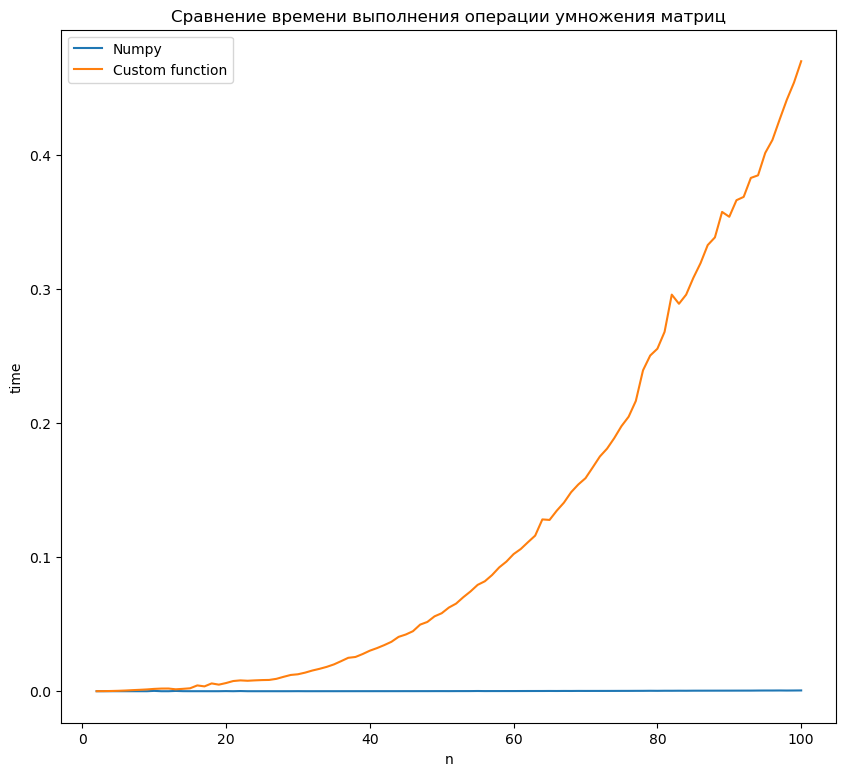

In [17]:
plt.figure(figsize = (10,9))
plt.plot(ns, timenp, label='Numpy')
plt.plot(ns, timef, label='Custom function')
plt.xlabel('n')
plt.ylabel('time')
plt.title('Сравнение времени выполнения операции умножения матриц')
plt.legend()
plt.show()

### Выводы
Как можно заметить при низких значения n разница во времени выполения опереации минимальна. Однако с ростом n она становится все более заметной. На графике можно увидеть, что при больших n функция умножения матриц, которая была сделана только с помощью встроенных функций Python, значительно дольше выполняется, чем функция Numpy.

### Задача 2. Pandas. EDA (35 баллов)

Вам предлагает проанализировать датасет с Data - вакансиями. Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью pd.read_csv.

In [18]:
import pandas as pd
gitlink = 'https://raw.githubusercontent.com/inreleppik/HSE-Python-for-DA/refs/heads/main/vacancies.csv'
df = pd.read_csv(gitlink, index_col=0)

0. Выведите первые 5 строк датасете. Примените к датасету методы info и describe **(1)**

In [19]:
df.head(5)

position_name  \
0                               Data Scientist Авито   
1                                       Data analyst   
2                         Data Engineer/Data Analyst   
3                      Стажер в направление Big Data   
4  Data Marketing Manager / Маркетолог по анализу...   

                                     employer_name     area  \
0                                     Changellenge   Москва   
1  Публичная Компания «Freedom Finance Global PLC»   Алматы   
2                                         IMANTECH  Ташкент   
3                                               T2   Москва   
4                                 Procter & Gamble   Алматы   

           experience       schedule        employment  \
0  От 1 года до 3 лет    Полный день  Полная занятость   
1  От 1 года до 3 лет    Полный день  Полная занятость   
2           Нет опыта  Гибкий график  Полная занятость   
3           Нет опыта    Полный день  Полная занятость   
4  От 1 года до 3 лет    Полный день  Полная занятость   

             professional_roles  \
0                        Другое   
1  BI-аналитик, аналитик данных   
2  BI-аналитик, аналитик данных   
3  BI-аналитик, аналитик данных   
4                        Другое   

                                              salary  \
0  {'from': 255000, 'to': 490000, 'currency': 'RU...   
1  {'from': 800000, 'to': 'null', 'currency': 'KZ...   
2                                                NaN   
3                                                NaN   
4  {'from': 950000, 'to': 'null', 'currency': 'KZ...   

                                         description  \
0  <p>В наших командах разрабатывают эффективные ...   
1  <p><strong>Обязанности</strong></p><ul><li>Изв...   
2  <p><strong>About Us:</strong> Welcome to <stro...   
3  <strong>Что нужно делать:</strong> <ul> <li>Со...   
4  <p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...   

                                          key_skills  
0                                                 []  
1                                                 []  
2  ['SQL', 'Визуализация данных', 'Python', 'Powe...  
3                                                 []  
4     ['Английский язык', 'Аналитический склад ума']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 0 to 1526
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   position_name       1527 non-null   object
 1   employer_name       1527 non-null   object
 2   area                1527 non-null   object
 3   experience          1527 non-null   object
 4   schedule            1527 non-null   object
 5   employment          1527 non-null   object
 6   professional_roles  1527 non-null   object
 7   salary              220 non-null    object
 8   description         1527 non-null   object
 9   key_skills          1527 non-null   object
dtypes: object(10)
memory usage: 131.2+ KB


In [21]:
df.describe()

position_name employer_name    area     experience     schedule  \
count            1527          1527    1527           1527         1527   
unique            793           524     102              4            5   
top     Data Engineer          СБЕР  Москва  От 3 до 6 лет  Полный день   
freq              126           146     912            724         1098   

              employment professional_roles  \
count               1527               1527   
unique                 4                 36   
top     Полная занятость     Дата-сайентист   
freq                1464                464   

                                                   salary  \
count                                                 220   
unique                                                130   
top     {'from': 100000, 'to': 110000, 'currency': 'RU...   
freq                                                   20   

                                              description key_skills  
count                                                1527       1527  
unique                                               1232        653  
top     <p>Striving to gain market-oriented knowledge ...         []  
freq                                                   46        607

1. Сколько в датасете строк и столбцов? **(1)**

In [22]:
df.shape

(1527, 10)

2. Есть ли в датасете пропуски? **(1)**

In [23]:
df.isna().sum()

position_name            0
employer_name            0
area                     0
experience               0
schedule                 0
employment               0
professional_roles       0
salary                1307
description              0
key_skills               0
dtype: int64

3. Есть в датасете полные дубли? Если да, удалите их. **(1)**

In [24]:
df.duplicated().sum()

146

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(1381, 10)

In [27]:
df.reset_index(inplace=True, drop=True)

4. Сколько уникальных значений у переменной professional_roles? **(1)**

In [28]:
len(df.professional_roles.unique())

36

5. Сколько в датасете вакансий, не требующих опыта? (**2**)

In [29]:
len(df[df.experience == 'Нет опыта'])

121

6. Какое среднее количество навыков в вакансии? (переменная key_skills) **(2)**

In [30]:
df.key_skills = df.key_skills.apply(eval)

In [31]:
df.key_skills.apply(len).mean()

3.873280231716148

7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency. **(2)**

In [32]:
def adv_eval(a):
    try:
        return eval(a)
    except:
        return a
def adv_extract(b, key):
    if type(b) != dict:
        return np.nan
    else:
        return b.get(key)

In [33]:
df.salary = df.salary.apply(adv_eval)

In [34]:
df['currency'] = df.salary.apply(adv_extract, args=('currency',))

In [35]:
df.head()

position_name  \
0                               Data Scientist Авито   
1                                       Data analyst   
2                         Data Engineer/Data Analyst   
3                      Стажер в направление Big Data   
4  Data Marketing Manager / Маркетолог по анализу...   

                                     employer_name     area  \
0                                     Changellenge   Москва   
1  Публичная Компания «Freedom Finance Global PLC»   Алматы   
2                                         IMANTECH  Ташкент   
3                                               T2   Москва   
4                                 Procter & Gamble   Алматы   

           experience       schedule        employment  \
0  От 1 года до 3 лет    Полный день  Полная занятость   
1  От 1 года до 3 лет    Полный день  Полная занятость   
2           Нет опыта  Гибкий график  Полная занятость   
3           Нет опыта    Полный день  Полная занятость   
4  От 1 года до 3 лет    Полный день  Полная занятость   

             professional_roles  \
0                        Другое   
1  BI-аналитик, аналитик данных   
2  BI-аналитик, аналитик данных   
3  BI-аналитик, аналитик данных   
4                        Другое   

                                              salary  \
0  {'from': 255000, 'to': 490000, 'currency': 'RU...   
1  {'from': 800000, 'to': 'null', 'currency': 'KZ...   
2                                                NaN   
3                                                NaN   
4  {'from': 950000, 'to': 'null', 'currency': 'KZ...   

                                         description  \
0  <p>В наших командах разрабатывают эффективные ...   
1  <p><strong>Обязанности</strong></p><ul><li>Изв...   
2  <p><strong>About Us:</strong> Welcome to <stro...   
3  <strong>Что нужно делать:</strong> <ul> <li>Со...   
4  <p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...   

                                          key_skills currency  
0                                                 []      RUR  
1                                                 []      KZT  
2  [SQL, Визуализация данных, Python, Power BI, A...      NaN  
3                                                 []      NaN  
4         [Английский язык, Аналитический склад ума]      KZT

8. Какая компания лидирует по количеству вакансий? **(2)**

In [36]:
df.employer_name.value_counts().index[0]

'СБЕР'

9.  Какая компания лидирует по количеству вакансий с указанием заработной платы? **(2)**

In [37]:
df[~df.salary.isna()].employer_name.value_counts().index[0]

'Aston'

10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to.  **(2)**

In [38]:
def salary_extract(x):
    a = adv_extract(x,'from')
    b = adv_extract(x, 'to')
    if (pd.isna(a))&(pd.isna(b)):
        return np.nan
    elif b == 'null':
        return a
    elif a == 'null':
        return b
    else:
        return np.mean([a,b])

In [39]:
df['salary_num'] = df.salary.apply(salary_extract)
df.head()

position_name  \
0                               Data Scientist Авито   
1                                       Data analyst   
2                         Data Engineer/Data Analyst   
3                      Стажер в направление Big Data   
4  Data Marketing Manager / Маркетолог по анализу...   

                                     employer_name     area  \
0                                     Changellenge   Москва   
1  Публичная Компания «Freedom Finance Global PLC»   Алматы   
2                                         IMANTECH  Ташкент   
3                                               T2   Москва   
4                                 Procter & Gamble   Алматы   

           experience       schedule        employment  \
0  От 1 года до 3 лет    Полный день  Полная занятость   
1  От 1 года до 3 лет    Полный день  Полная занятость   
2           Нет опыта  Гибкий график  Полная занятость   
3           Нет опыта    Полный день  Полная занятость   
4  От 1 года до 3 лет    Полный день  Полная занятость   

             professional_roles  \
0                        Другое   
1  BI-аналитик, аналитик данных   
2  BI-аналитик, аналитик данных   
3  BI-аналитик, аналитик данных   
4                        Другое   

                                              salary  \
0  {'from': 255000, 'to': 490000, 'currency': 'RU...   
1  {'from': 800000, 'to': 'null', 'currency': 'KZ...   
2                                                NaN   
3                                                NaN   
4  {'from': 950000, 'to': 'null', 'currency': 'KZ...   

                                         description  \
0  <p>В наших командах разрабатывают эффективные ...   
1  <p><strong>Обязанности</strong></p><ul><li>Изв...   
2  <p><strong>About Us:</strong> Welcome to <stro...   
3  <strong>Что нужно делать:</strong> <ul> <li>Со...   
4  <p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...   

                                          key_skills currency  salary_num  
0                                                 []      RUR    372500.0  
1                                                 []      KZT    800000.0  
2  [SQL, Визуализация данных, Python, Power BI, A...      NaN         NaN  
3                                                 []      NaN         NaN  
4         [Английский язык, Аналитический склад ума]      KZT    950000.0

11. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре).  Какой процент вакансий требует знания python? **(2)**

In [40]:
def pythonin(x):
    return int('python' in list(map(str.lower, x)))

In [41]:
df['is_python_requirement'] = df.key_skills.apply(pythonin)
df.head()

position_name  \
0                               Data Scientist Авито   
1                                       Data analyst   
2                         Data Engineer/Data Analyst   
3                      Стажер в направление Big Data   
4  Data Marketing Manager / Маркетолог по анализу...   

                                     employer_name     area  \
0                                     Changellenge   Москва   
1  Публичная Компания «Freedom Finance Global PLC»   Алматы   
2                                         IMANTECH  Ташкент   
3                                               T2   Москва   
4                                 Procter & Gamble   Алматы   

           experience       schedule        employment  \
0  От 1 года до 3 лет    Полный день  Полная занятость   
1  От 1 года до 3 лет    Полный день  Полная занятость   
2           Нет опыта  Гибкий график  Полная занятость   
3           Нет опыта    Полный день  Полная занятость   
4  От 1 года до 3 лет    Полный день  Полная занятость   

             professional_roles  \
0                        Другое   
1  BI-аналитик, аналитик данных   
2  BI-аналитик, аналитик данных   
3  BI-аналитик, аналитик данных   
4                        Другое   

                                              salary  \
0  {'from': 255000, 'to': 490000, 'currency': 'RU...   
1  {'from': 800000, 'to': 'null', 'currency': 'KZ...   
2                                                NaN   
3                                                NaN   
4  {'from': 950000, 'to': 'null', 'currency': 'KZ...   

                                         description  \
0  <p>В наших командах разрабатывают эффективные ...   
1  <p><strong>Обязанности</strong></p><ul><li>Изв...   
2  <p><strong>About Us:</strong> Welcome to <stro...   
3  <strong>Что нужно делать:</strong> <ul> <li>Со...   
4  <p><strong>Найм в ТОО «Проктер энд Гэмбл Казах...   

                                          key_skills currency  salary_num  \
0                                                 []      RUR    372500.0   
1                                                 []      KZT    800000.0   
2  [SQL, Визуализация данных, Python, Power BI, A...      NaN         NaN   
3                                                 []      NaN         NaN   
4         [Английский язык, Аналитический склад ума]      KZT    950000.0   

   is_python_requirement  
0                      0  
1                      0  
2                      1  
3                      0  
4                      0

12. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement. Найдите по каждой группе количество опубликованных вакансий, среднюю заработную плату среди вакансий с указанием зарплаты в рублях, количество компаний, которые опубликовали вакансии.  **(3)**

In [42]:
res = (df[df.currency == 'RUR'].groupby(['experience',
             'schedule','employment',
             'is_python_requirement'])
 .agg({'salary_num':[('avg_salary','mean')],
      'position_name':[('quantity of vacancies','count')],
       'employer_name':[('the amount of companies','nunique')]
      }))
res.columns = res.columns.droplevel(0)
res

avg_salary  \
experience         schedule         employment          is_python_requirement                  
Более 6 лет        Полный день      Полная занятость    0                      318000.000000   
                   Удаленная работа Полная занятость    0                      450000.000000   
                                                        1                      310000.000000   
Нет опыта          Гибкий график    Полная занятость    1                      225000.000000   
                   Полный день      Полная занятость    0                       67571.428571   
                                                        1                       85714.285714   
                                    Стажировка          0                       66100.000000   
                   Удаленная работа Полная занятость    0                       56000.000000   
                                    Стажировка          1                      105000.000000   
От 1 года до 3 лет Гибкий график    Полная занятость    0                      110000.000000   
                                                        1                      163333.333333   
                   Полный день      Полная занятость    0                      218919.354839   
                                                        1                      140312.500000   
                   Удаленная работа Полная занятость    0                      178333.333333   
                                                        1                      177500.000000   
От 3 до 6 лет      Полный день      Полная занятость    0                      347500.000000   
                                                        1                      338460.000000   
                                    Проектная работа    1                      250000.000000   
                   Удаленная работа Полная занятость    0                      343958.333333   
                                                        1                      234558.823529   
                                    Частичная занятость 0                      150000.000000   

                                                                               quantity of vacancies  \
experience         schedule         employment          is_python_requirement                          
Более 6 лет        Полный день      Полная занятость    0                                          5   
                   Удаленная работа Полная занятость    0                                          1   
                                                        1                                          2   
Нет опыта          Гибкий график    Полная занятость    1                                          1   
                   Полный день      Полная занятость    0                                          7   
                                                        1                                          7   
                                    Стажировка          0                                          1   
                   Удаленная работа Полная занятость    0                                          1   
                                    Стажировка          1                                         18   
От 1 года до 3 лет Гибкий график    Полная занятость    0                                          2   
                                                        1                                          3   
                   Полный день      Полная занятость    0                                         31   
                                                        1                                         16   
                   Удаленная работа Полная занятость    0                                          9   
                                                        1                                          6   
От 3 до 6 лет      Полный день      Полная занятость    0                                         10   
 

13. Сделайте сводную таблицу (pd.pivot_table) по компаниям: название компании, количество вакансий, средняя заработная плата среди вакансий с указанием зарплаты в рублях. **(3)**

In [43]:
res = pd.pivot_table(df[df.currency == 'RUR'],
              values='salary_num',
              index = 'employer_name',
              aggfunc={'salary_num':'mean', 'employer_name':'size'})
res = res.rename(columns={'employer_name': 'Companies', 'salary_num': 'avg_salary'})
res.head(10)

Companies     avg_salary
employer_name                                  
Appie.tech                     2  262500.000000
Assistance Group               1  450000.000000
Aston                         22  103181.818182
Career Solutions               1  150000.000000
Changellenge                   6  397500.000000
CloudSquad                     2  375000.000000
DIID.TECH                      1   85000.000000
DNS Технологии                 2   70000.000000
Datana                         1  300000.000000
Diamond Personnel R&C          1  400000.000000

14. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов. **(3)**

In [44]:
df.key_skills.explode().value_counts()[:10].to_frame()

key_skills
Python                  578
SQL                     532
ETL                     146
Big Data                125
Hadoop                  110
PostgreSQL              107
DWH                     103
Clickhouse               94
Английский язык          82
Анализ данных            76

15. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  **(2)**

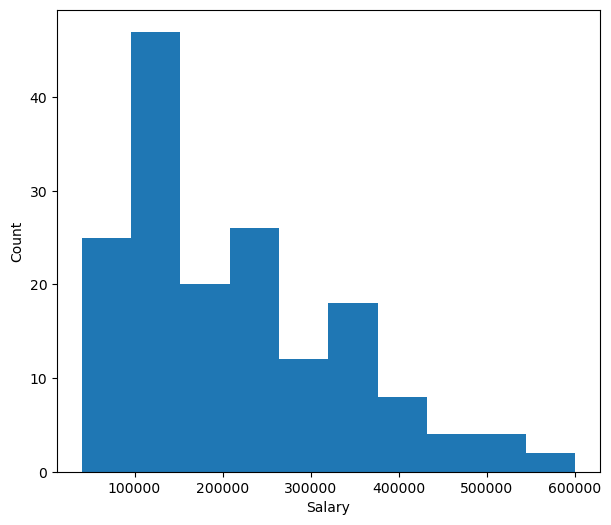

In [45]:
plt.figure(figsize = (7,6))
plt.hist(df[(~df.salary_num.isna())&(df.currency == 'RUR')]['salary_num'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

16. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience **(2)**

In [46]:
import seaborn as sns

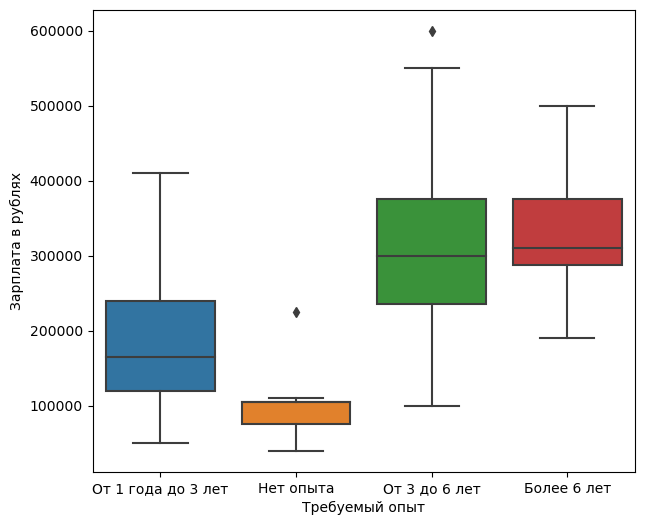

In [47]:
plt.figure(figsize = (7,6))
sns.boxplot(data=df[df.currency == 'RUR'], y = 'salary_num', x = 'experience' )
plt.ylabel('Зарплата в рублях')
plt.xlabel('Требуемый опыт')
plt.show()

17. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

Давайте тогда посмотрим на топ 10 наиболее часто встречающихся ролей. Надеюсь за такой простой вопрос снижения по баллам не будет)))

In [48]:
df.professional_roles.value_counts()[:10].to_frame()

professional_roles
Дата-сайентист                                                     421
BI-аналитик, аналитик данных                                       258
Программист, разработчик                                           240
Аналитик                                                           228
Другое                                                              86
Руководитель группы разработки                                      20
Менеджер по продажам, менеджер по работе с клие...                  19
Руководитель проектов                                               13
Продуктовый аналитик                                                12
Руководитель отдела аналитики                                       10

### Задача 3. Ещё pandas и EDA (30 баллов)

Используем датасет: https://disk.yandex.ru/d/yv2Tx1nYiIFf-A

Cкачайте и считайте его с помощью pd.read_csv.

**Список столбцов:**  
item_id - id товара  
product_category_name - id категории  
month_year - первое число месяца, за который взяты данные  
qty - количество  
total_price - суммарная стоимость  
unit_price - цена  
product_name_lenght  
product_description_lenght  
holiday - количество праздников в месяце  
volume - объем  
comp_price - цена у одного из конкурентов  

In [49]:
giturl = 'https://raw.githubusercontent.com/inreleppik/HSE-Python-for-DA/refs/heads/main/items.csv'
df = pd.read_csv(giturl, index_col=0)

0. Посмотрите на датасет, выведите первые пять строк и список столбцов **(0.1)**

In [50]:
df.head()

item_id product_category_name  month_year  qty  total_price  unit_price  \
0    bed1        bed_bath_table  01-05-2017    1        45.95       45.95   
1    bed1        bed_bath_table  01-06-2017    3       137.85       45.95   
2    bed1        bed_bath_table  01-07-2017    6       275.70       45.95   
3    bed1        bed_bath_table  01-08-2017    4       183.80       45.95   
4    bed1        bed_bath_table  01-09-2017    2        91.90       45.95   

   product_name_lenght  product_description_lenght  customers  holiday  \
0                   39                         161         57        1   
1                   39                         161         61        1   
2                   39                         161        123        1   
3                   39                         161         90        1   
4                   39                         161         54        1   

   volume  comp_price  
0    3800       45.95  
1    3800       45.95  
2    3800       45.95  
3    3800       45.95  
4    3800       45.95

1. Сколько в датасете строк и столбцов? **(0.4)**

In [51]:
df.shape #первое значение строки, а второе столбцы

(676, 12)

2. Есть ли пропуски?  **(0.5)**

In [52]:
df.isna().sum()

item_id                       0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
customers                     0
holiday                       0
volume                        0
comp_price                    0
dtype: int64

3. Есть ли в датасете полные дубли? Если да, удалите их.  **(1)**

In [53]:
df.duplicated().sum() #полных дублей нет

0

4. Выведите описательные статистики по переменным.  **(1)**

In [54]:
df.describe()

qty   total_price  unit_price  product_name_lenght  \
count  676.000000    676.000000  676.000000           676.000000   
mean    14.495562   1422.708728  106.496800            48.720414   
std     15.443421   1700.123100   76.182972             9.420715   
min      1.000000     19.900000   19.900000            29.000000   
25%      4.000000    333.700000   53.900000            40.000000   
50%     10.000000    807.890000   89.900000            51.000000   
75%     18.000000   1887.322500  129.990000            57.000000   
max    122.000000  12095.000000  364.000000            60.000000   

       product_description_lenght   customers     holiday        volume  \
count                  676.000000  676.000000  676.000000    676.000000   
mean                   767.399408   81.028107    1.494083  10664.627219   
std                    655.205015   62.055560    0.940430   9172.801850   
min                    100.000000    1.000000    0.000000    640.000000   
25%                    339.000000   34.000000    1.000000   3510.000000   
50%                    501.000000   62.000000    1.000000   8000.000000   
75%                    903.000000  116.000000    2.000000  15750.000000   
max                   3006.000000  339.000000    4.000000  32736.000000   

       comp_price  
count  676.000000  
mean    84.182642  
std     47.745789  
min     19.900000  
25%     53.785714  
50%     59.900000  
75%     99.990000  
max    255.610000

In [55]:
df.describe(include='object')

item_id product_category_name  month_year
count       676                   676         676
unique       52                     9          20
top     health5          garden_tools  01-03-2018
freq         20                   160          50

5. Используя pd.to_datetime, приведите столбец month_year к дате.  **(1)**

In [56]:
df.head()

item_id product_category_name  month_year  qty  total_price  unit_price  \
0    bed1        bed_bath_table  01-05-2017    1        45.95       45.95   
1    bed1        bed_bath_table  01-06-2017    3       137.85       45.95   
2    bed1        bed_bath_table  01-07-2017    6       275.70       45.95   
3    bed1        bed_bath_table  01-08-2017    4       183.80       45.95   
4    bed1        bed_bath_table  01-09-2017    2        91.90       45.95   

   product_name_lenght  product_description_lenght  customers  holiday  \
0                   39                         161         57        1   
1                   39                         161         61        1   
2                   39                         161        123        1   
3                   39                         161         90        1   
4                   39                         161         54        1   

   volume  comp_price  
0    3800       45.95  
1    3800       45.95  
2    3800       45.95  
3    3800       45.95  
4    3800       45.95

In [57]:
df.month_year = df.month_year.apply(pd.to_datetime)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 675
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   item_id                     676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   unit_price                  676 non-null    float64       
 6   product_name_lenght         676 non-null    int64         
 7   product_description_lenght  676 non-null    int64         
 8   customers                   676 non-null    int64         
 9   holiday                     676 non-null    int64         
 10  volume                      676 non-null    int64         
 11  comp_price                  676 non-null    float64       

6. Создайте столбцы year и month. **(1)**

In [59]:
df['month'] = df.month_year.dt.month
df['year'] = df.month_year.dt.year
df.head()

item_id product_category_name month_year  qty  total_price  unit_price  \
0    bed1        bed_bath_table 2017-01-05    1        45.95       45.95   
1    bed1        bed_bath_table 2017-01-06    3       137.85       45.95   
2    bed1        bed_bath_table 2017-01-07    6       275.70       45.95   
3    bed1        bed_bath_table 2017-01-08    4       183.80       45.95   
4    bed1        bed_bath_table 2017-01-09    2        91.90       45.95   

   product_name_lenght  product_description_lenght  customers  holiday  \
0                   39                         161         57        1   
1                   39                         161         61        1   
2                   39                         161        123        1   
3                   39                         161         90        1   
4                   39                         161         54        1   

   volume  comp_price  month  year  
0    3800       45.95      1  2017  
1    3800       45.95      1  2017  
2    3800       45.95      1  2017  
3    3800       45.95      1  2017  
4    3800       45.95      1  2017

7. Какой период времени покрывается данными?   **(1)**

In [60]:
df.month_year.min()

Timestamp('2017-01-01 00:00:00')

In [61]:
df.month_year.max()

Timestamp('2018-01-08 00:00:00')

In [62]:
df.month_year.unique()

array(['2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-07T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000', '2017-01-10T00:00:00.000000000',
       '2017-01-11T00:00:00.000000000', '2017-01-12T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-02T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

Данными покрывается период времени с января 2017 по август 2018

8. Сколько в датасете товаров? Сколько категорий?   **(1)**

In [63]:
df.item_id.nunique() #количество товаров

52

In [64]:
df.product_category_name.nunique() #количество категорий

9

9. Создайте столбец category_median_price, который будет содержать медианную цену категории (у строк с одним значением product_category_name) будет одно значение этого столбца. **(2)**

In [65]:
df['category_median_price'] = df.groupby('product_category_name')['unit_price'].transform('median')
df.head()

item_id product_category_name month_year  qty  total_price  unit_price  \
0    bed1        bed_bath_table 2017-01-05    1        45.95       45.95   
1    bed1        bed_bath_table 2017-01-06    3       137.85       45.95   
2    bed1        bed_bath_table 2017-01-07    6       275.70       45.95   
3    bed1        bed_bath_table 2017-01-08    4       183.80       45.95   
4    bed1        bed_bath_table 2017-01-09    2        91.90       45.95   

   product_name_lenght  product_description_lenght  customers  holiday  \
0                   39                         161         57        1   
1                   39                         161         61        1   
2                   39                         161        123        1   
3                   39                         161         90        1   
4                   39                         161         54        1   

   volume  comp_price  month  year  category_median_price  
0    3800       45.95      1  2017                   84.9  
1    3800       45.95      1  2017                   84.9  
2    3800       45.95      1  2017                   84.9  
3    3800       45.95      1  2017                   84.9  
4    3800       45.95      1  2017                   84.9

10. Есть ли в датасете аномальные значения полей qty, unit_price,	total_price? **(2)**

In [66]:
def bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

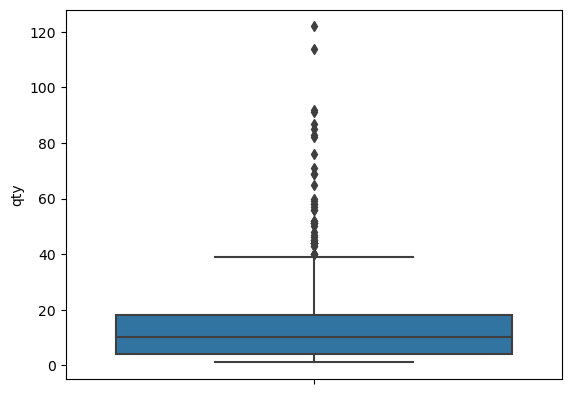

In [67]:
sns.boxplot(data=df, y = 'qty')
plt.show()

In [68]:
lb, ub = bounds(df, 'qty')
df[(df.qty < lb)|(df.qty>ub)][:5]

item_id  product_category_name month_year  qty  total_price  \
90      health3          health_beauty 2018-01-06   43      5288.57   
140     garden4           garden_tools 2017-01-11   69      3711.70   
141     garden4           garden_tools 2017-01-12   44      2468.60   
143     garden4           garden_tools 2018-01-02   48      2411.20   
152  computers5  computers_accessories 2018-01-01   57      5453.96   

     unit_price  product_name_lenght  product_description_lenght  customers  \
90   122.990000                   50                        1257        131   
140   53.785714                   57                         366        339   
141   55.750000                   57                         366        184   
143   50.357143                   57                         366        160   
152   93.094894                   33                         300        152   

     holiday  volume  comp_price  month  year  category_median_price  
90         0    5700   58.990000      1  2018                  79.99  
140        4   19800   53.785714      1  2017                  59.90  
141        1   19800   55.750000      1  2017                  59.90  
143        2   19800   50.357143      1  2018                  59.90  
152        2    2926   97.642500      1  2018                 119.99

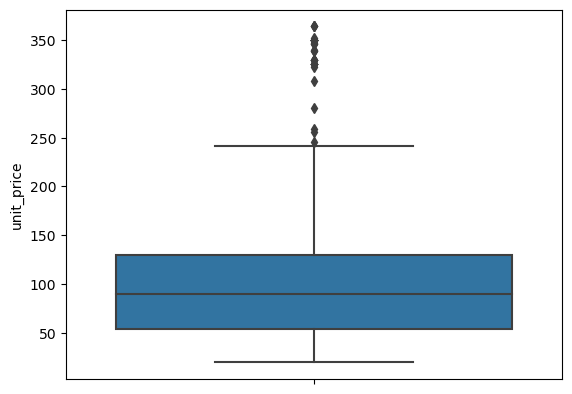

In [69]:
sns.boxplot(data=df, y = 'unit_price')
plt.show()

In [70]:
lb, ub = bounds(df, 'unit_price')
df[(df.unit_price < lb)|(df.unit_price > ub)][:5]

item_id product_category_name month_year  qty  total_price  unit_price  \
339  health5         health_beauty 2017-01-01    8       2799.2       349.9   
340  health5         health_beauty 2017-01-02    4       1399.6       349.9   
341  health5         health_beauty 2017-01-03    2        699.8       349.9   
342  health5         health_beauty 2017-01-04    1        349.9       349.9   
343  health5         health_beauty 2017-01-05    4       1399.6       349.9   

     product_name_lenght  product_description_lenght  customers  holiday  \
339                   51                         625          9        1   
340                   51                         625         19        2   
341                   51                         625         25        1   
342                   51                         625         23        2   
343                   51                         625         41        1   

     volume  comp_price  month  year  category_median_price  
339   11400       64.99      1  2017                  79.99  
340   11400       64.99      1  2017                  79.99  
341   11400       64.99      1  2017                  79.99  
342   11400       64.99      1  2017                  79.99  
343   11400       64.99      1  2017                  79.99

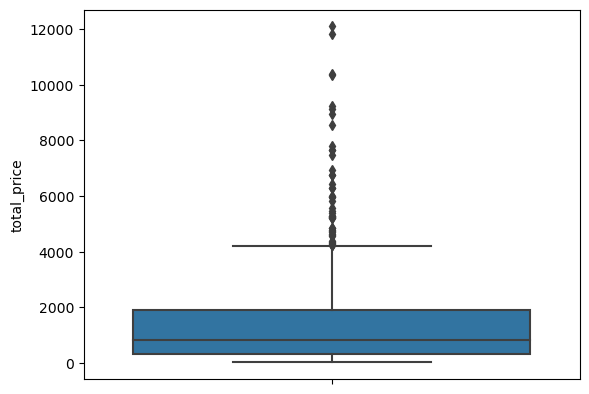

In [71]:
sns.boxplot(data=df, y = 'total_price')
plt.show()

In [72]:
lb, ub = bounds(df, 'total_price')
df[(df.total_price < lb)|(df.total_price > ub)][:5]

item_id  product_category_name month_year  qty  total_price  \
79        cool4             cool_stuff 2017-01-11   27      4248.73   
80        cool4             cool_stuff 2017-01-12   29      4842.71   
90      health3          health_beauty 2018-01-06   43      5288.57   
152  computers5  computers_accessories 2018-01-01   57      5453.96   
164    garden10           garden_tools 2017-01-11   87      4712.19   

     unit_price  product_name_lenght  product_description_lenght  customers  \
79   157.360370                   40                        1456         42   
80   166.990000                   40                        1456         38   
90   122.990000                   50                        1257        131   
152   93.094894                   33                         300        152   
164   53.648281                   59                         341        339   

     holiday  volume  comp_price  month  year  category_median_price  
79         4   16530  157.360370      1  2017                  99.99  
80         1   16530  166.990000      1  2017                  99.99  
90         0    5700   58.990000      1  2018                  79.99  
152        2    2926   97.642500      1  2018                 119.99  
164        4   32560   53.785714      1  2017                  59.90

Как можно заметить исходя из графиков распределений, аномальные значения наблюдаются во всех перечисленных стобцах. На всякий случай еще были определены аномалии с помощью интерквантильного размаха

11. В какой категории самая высокая средняя цена товара? **(2)**

In [73]:
res = df.groupby('product_category_name')[['unit_price']].mean()
res

unit_price
product_category_name            
bed_bath_table          78.629278
computers_accessories  119.482323
consoles_games          27.033766
cool_stuff             107.857512
furniture_decor         60.154262
garden_tools            80.094699
health_beauty          132.309870
perfumery               89.348813
watches_gifts          164.880007

Наиболее высокая средняя цена у категории `watches_gifts`

12. Постройте scatter plot зависимости спроса (qty) от цены (unit price) **(1)**. Напишите функцию, которая принимает на вход датасет, названия столбцов, название графика и осей и рисует scatter plot. Нариcуйте все scatter plot от числовых переменных. **(1)**

In [74]:
def scatter_p(d, x, y, xl = '', yl = '', title = None):
    if (xl == '')&(yl == ''):
        xl, yl = x, y
    plt.figure(figsize = (5,5))
    sns.scatterplot(data=d, x = x, y = y)
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

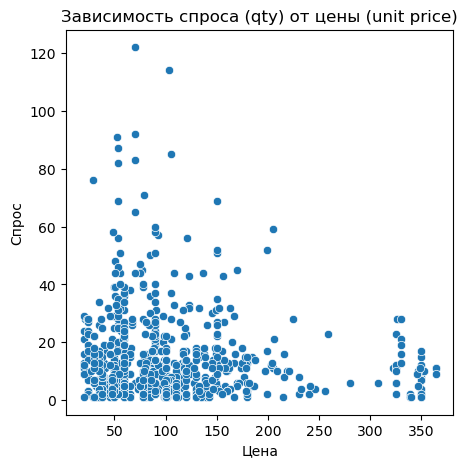

In [75]:
scatter_p(df, 'unit_price', 'qty', 'Цена', 'Спрос', 'Зависимость спроса (qty) от цены (unit price)')

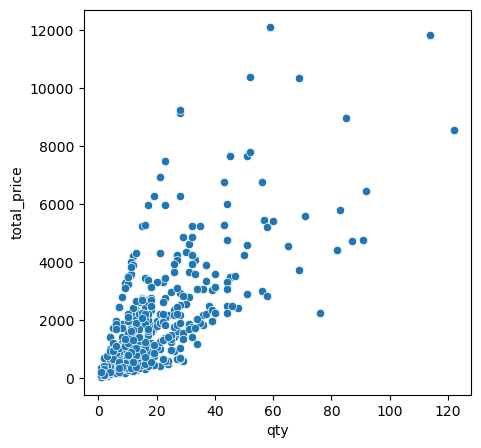

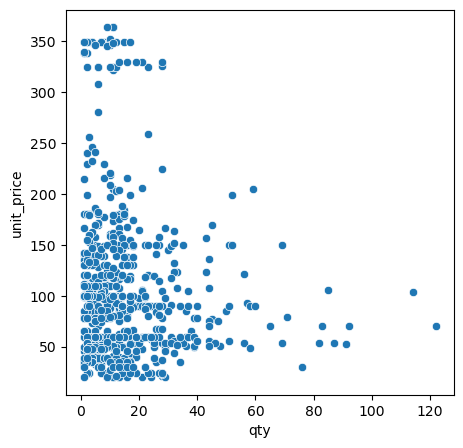

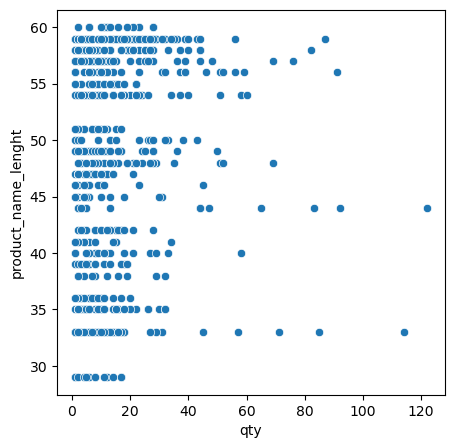

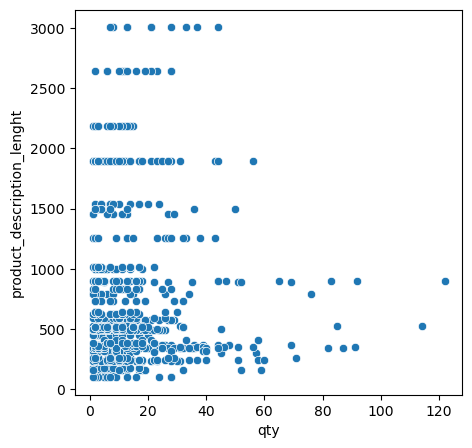

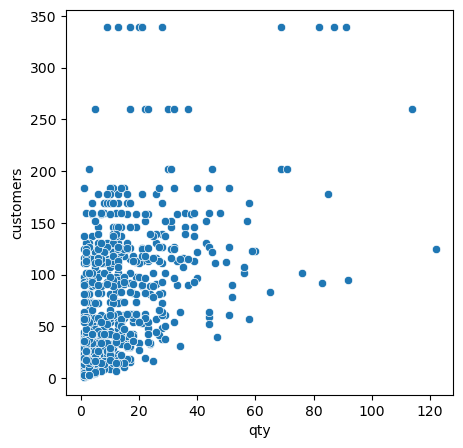

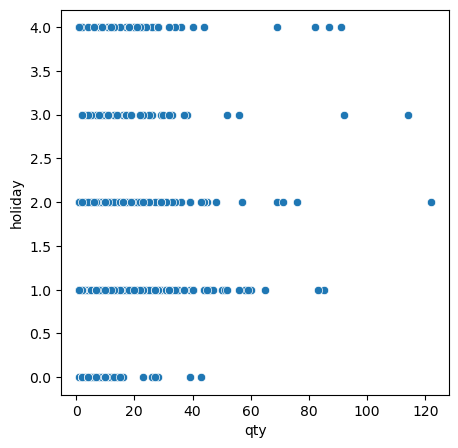

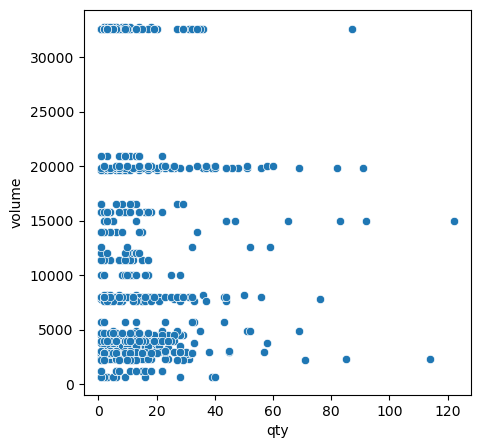

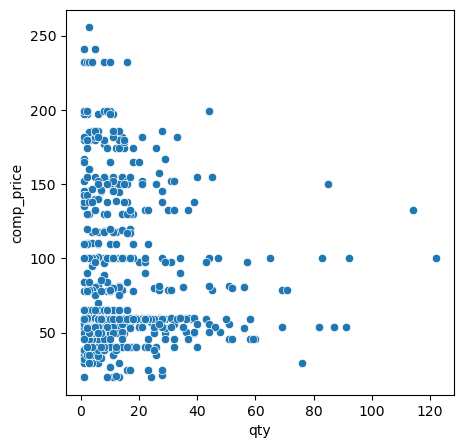

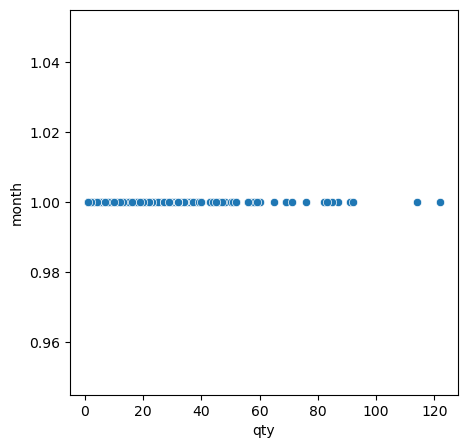

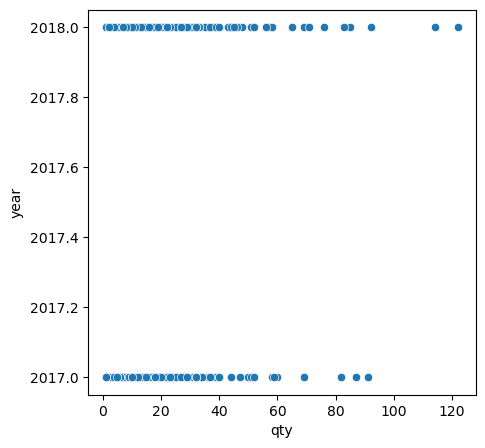

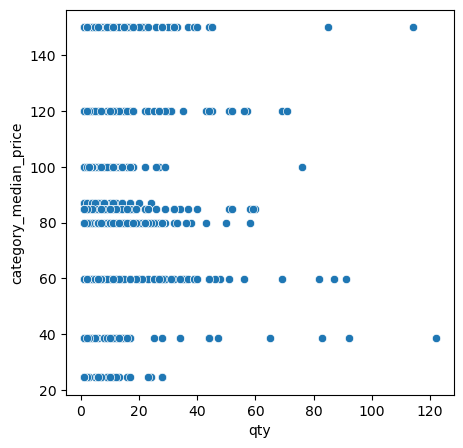

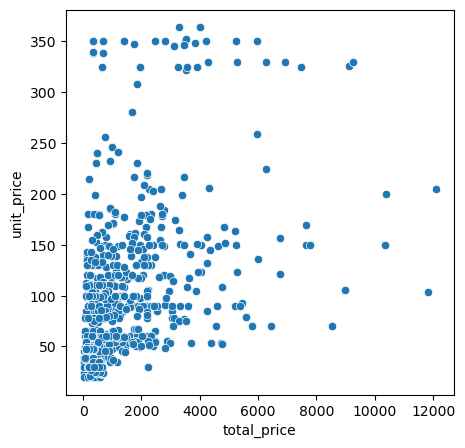

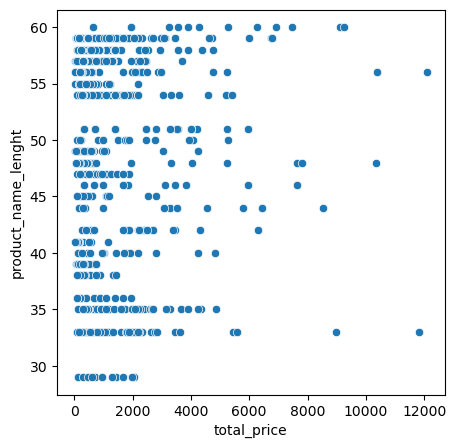

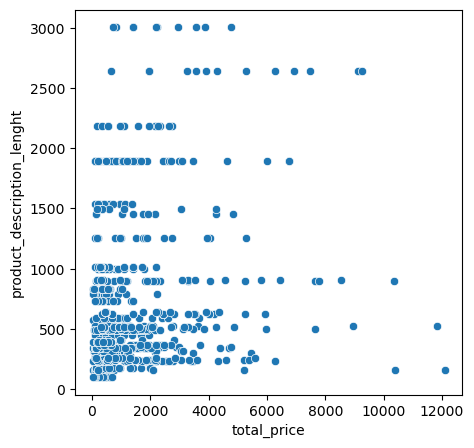

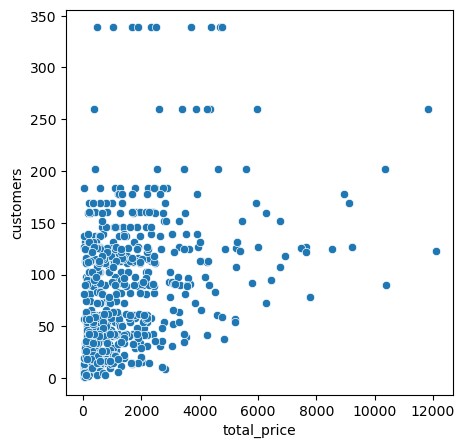

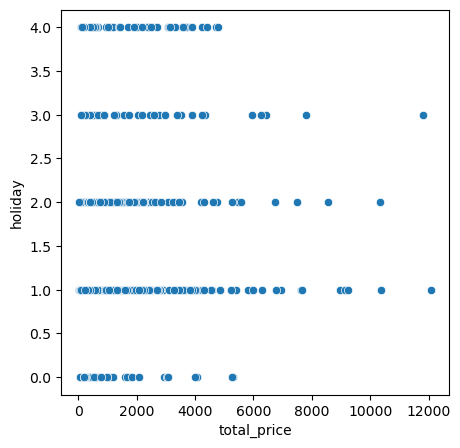

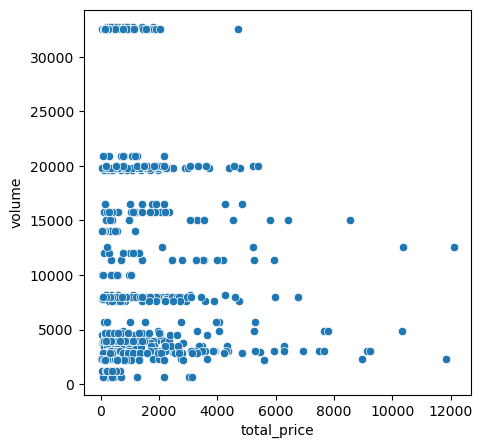

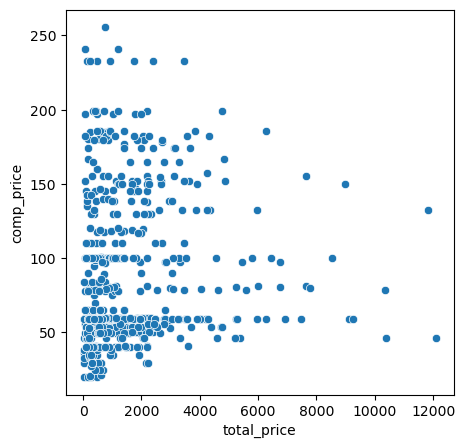

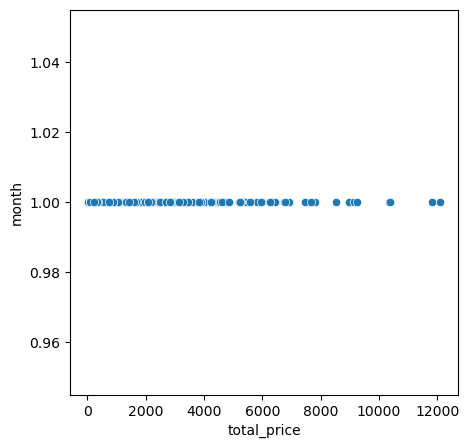

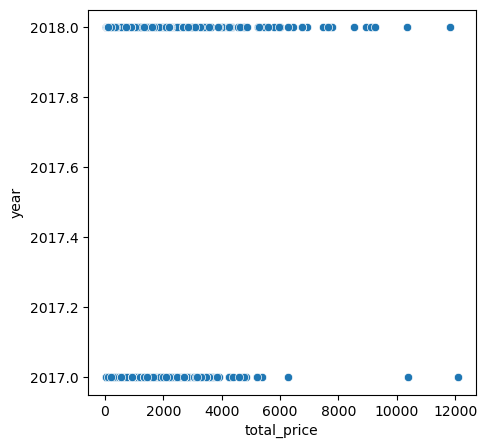

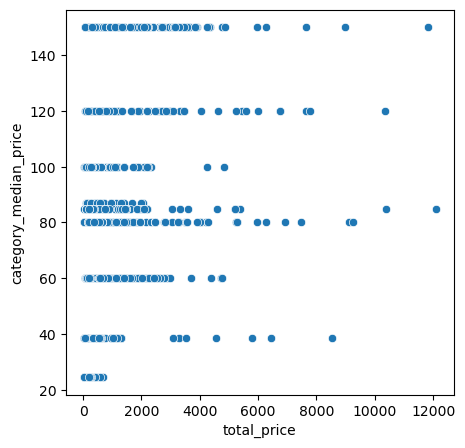

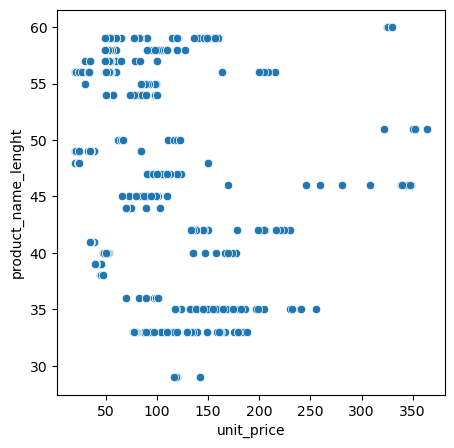

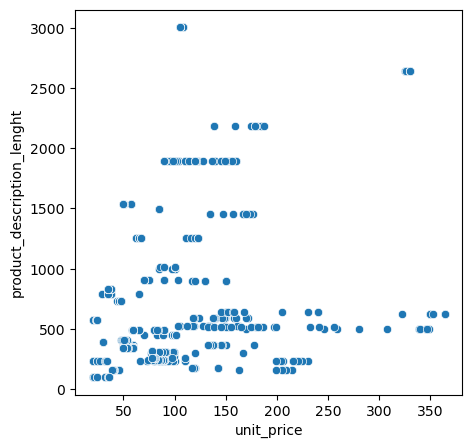

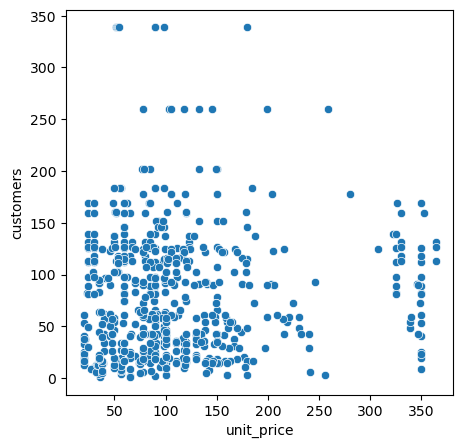

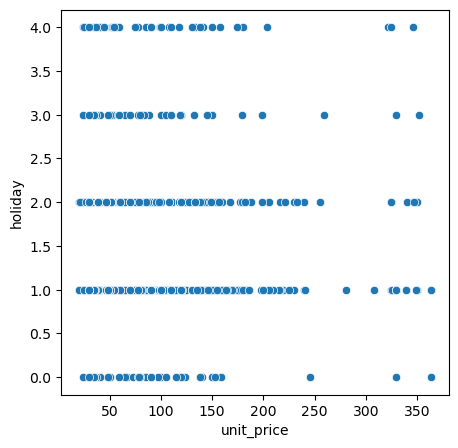

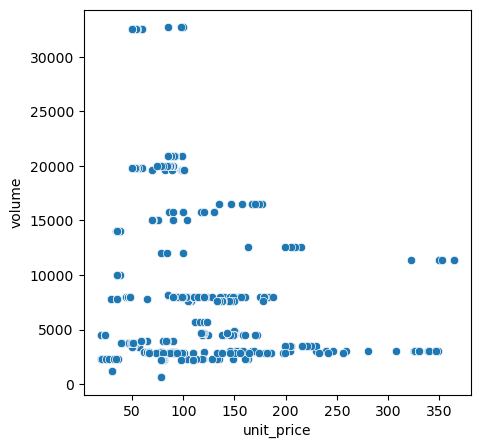

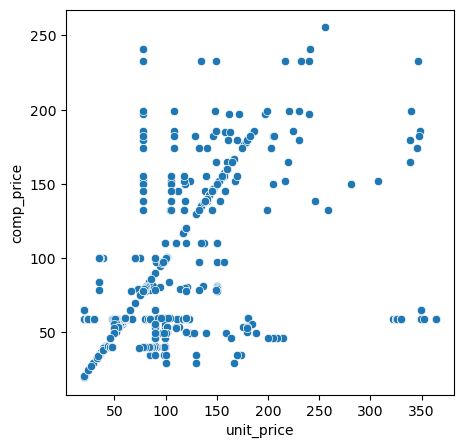

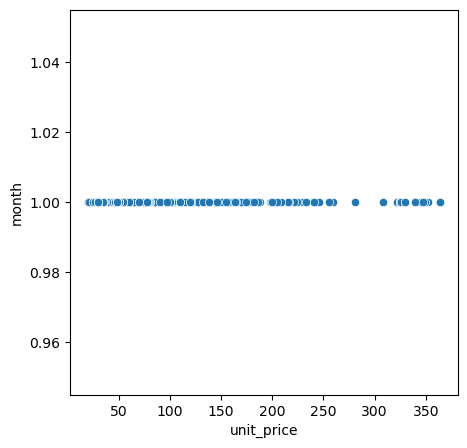

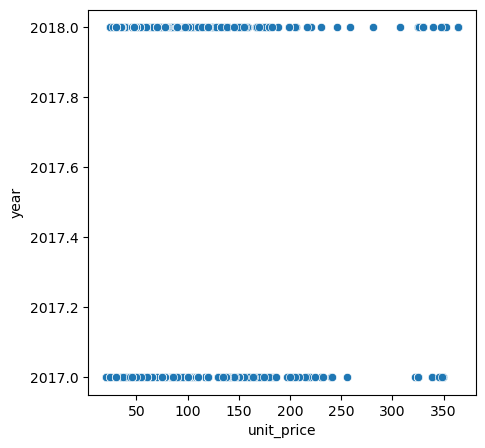

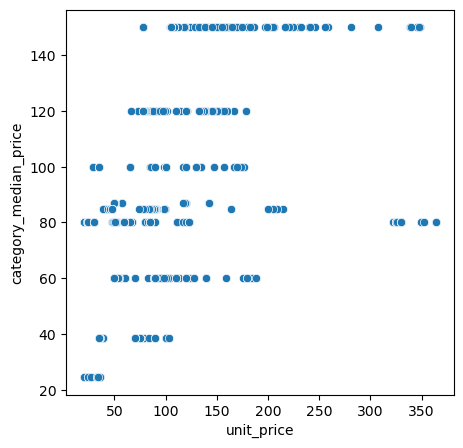

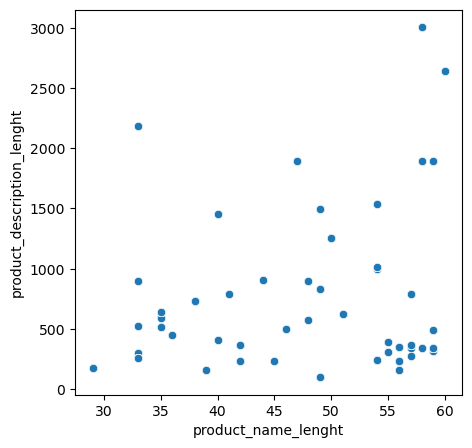

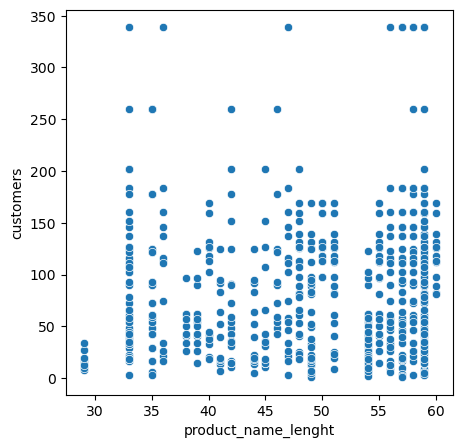

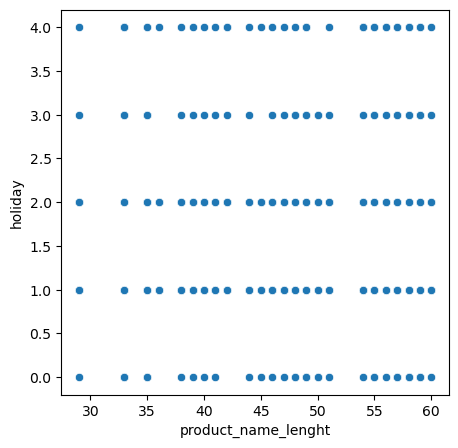

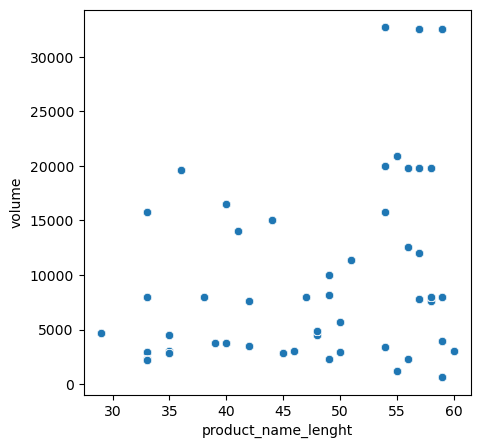

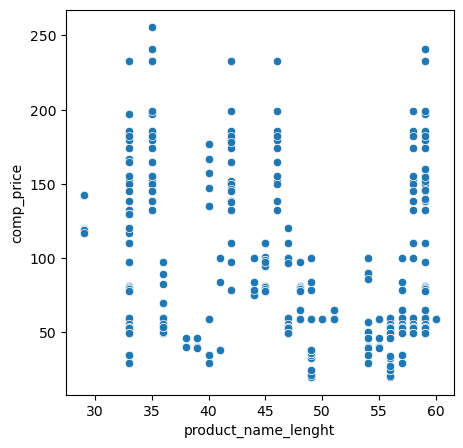

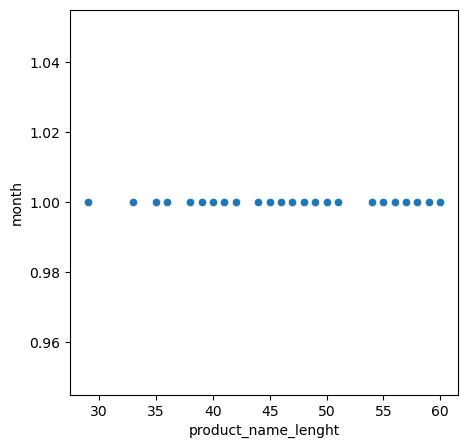

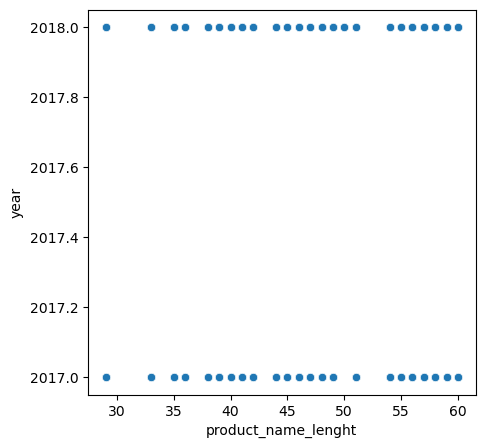

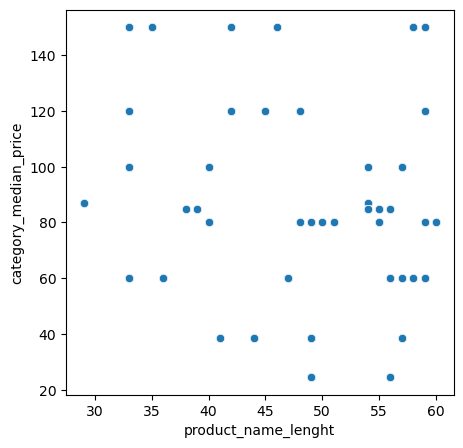

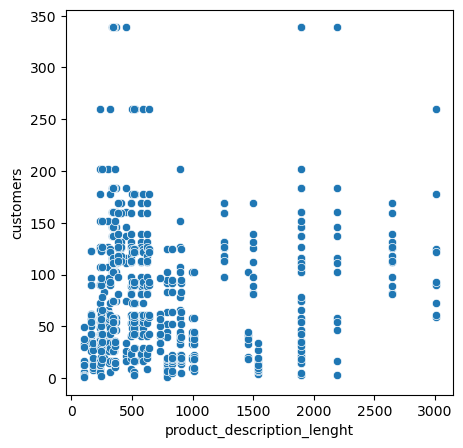

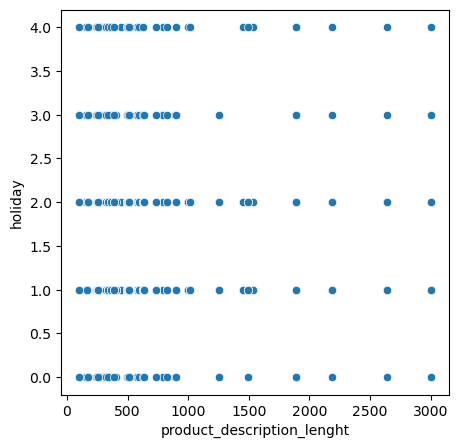

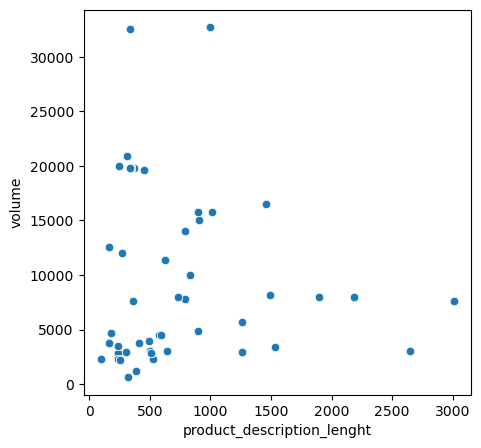

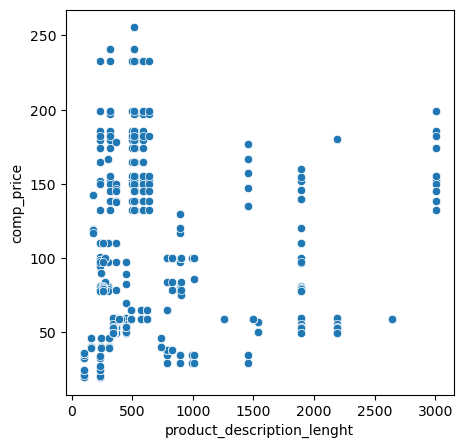

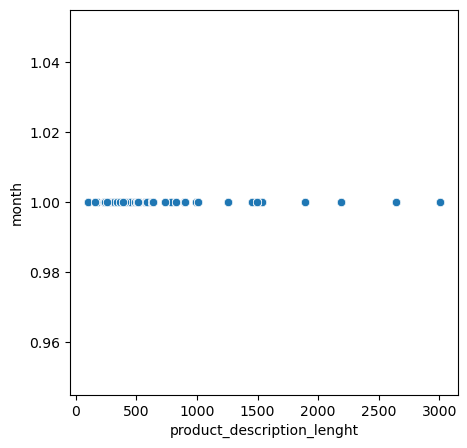

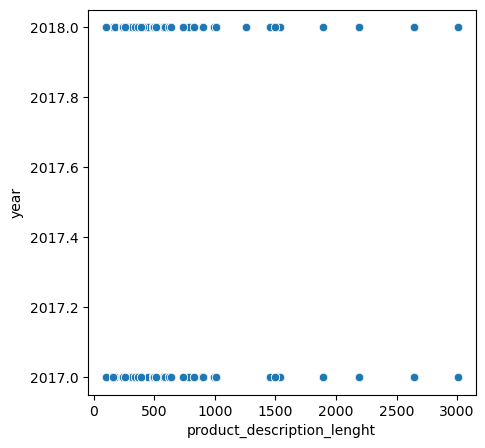

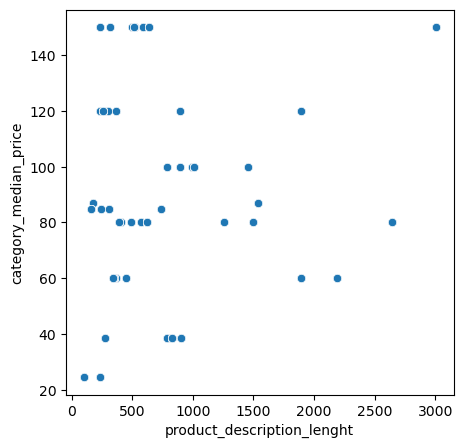

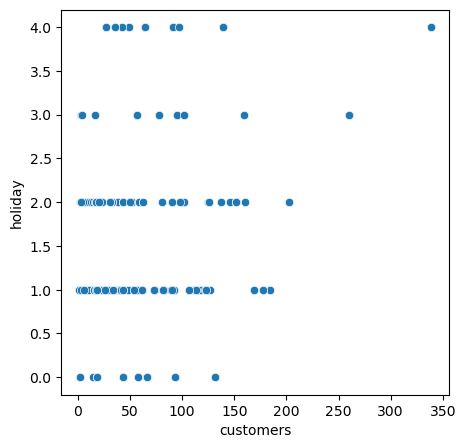

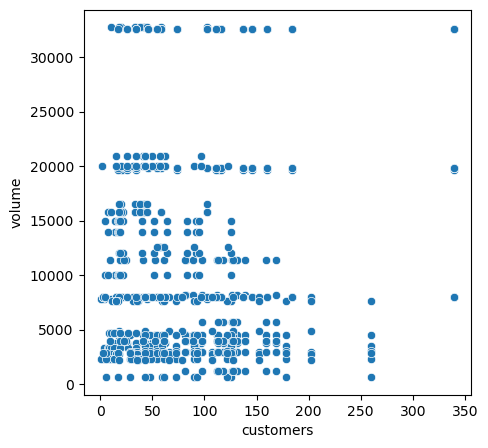

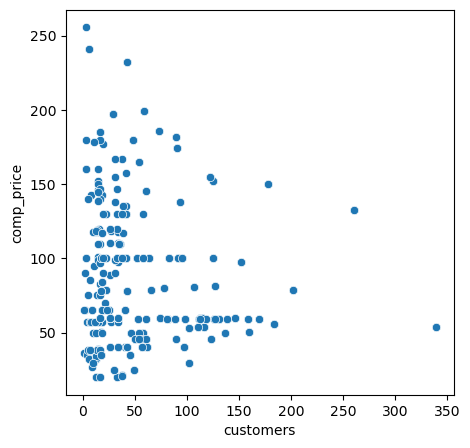

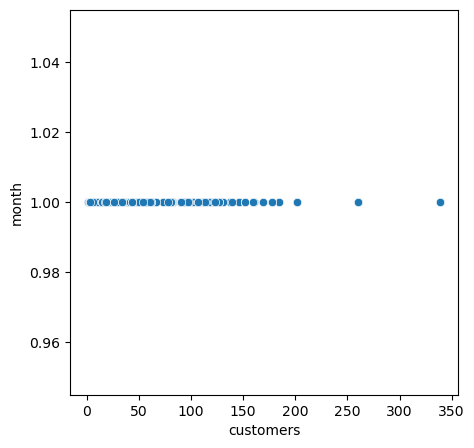

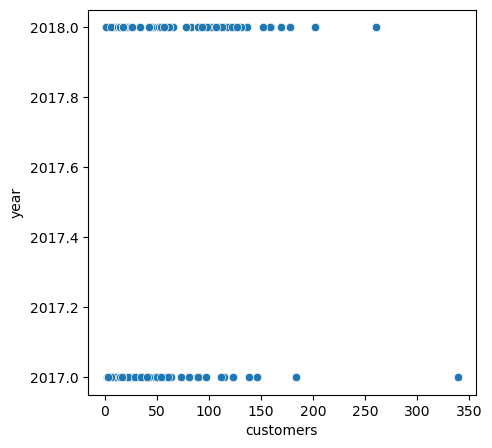

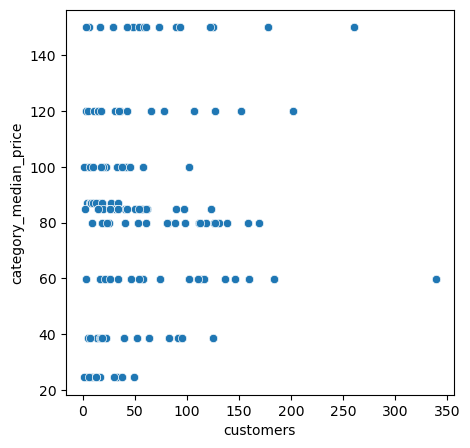

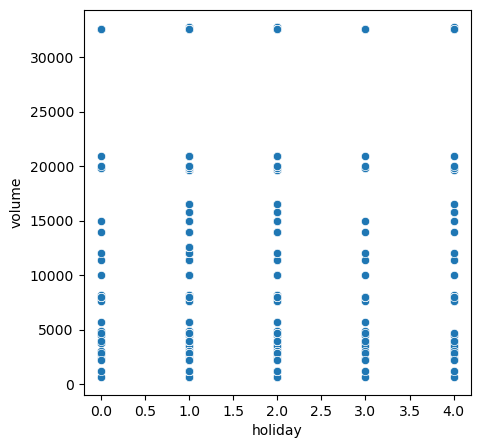

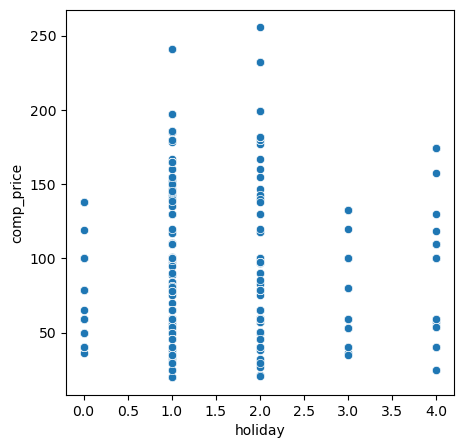

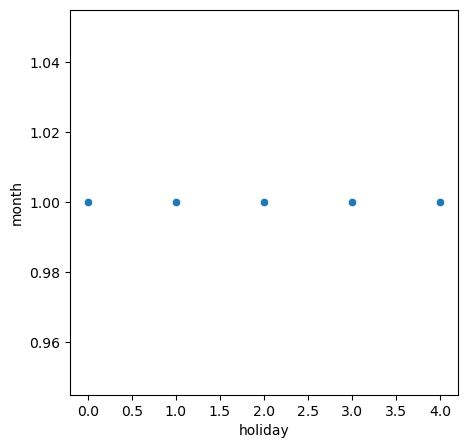

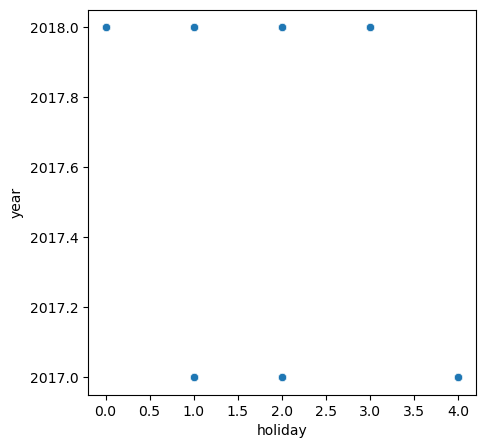

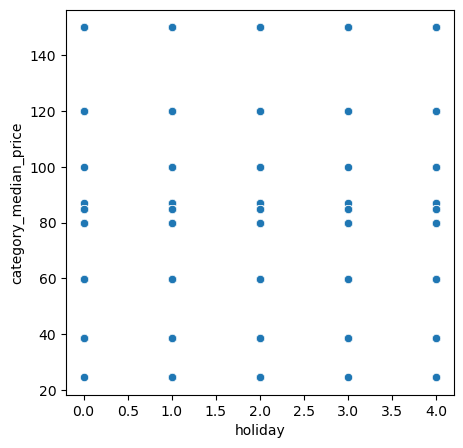

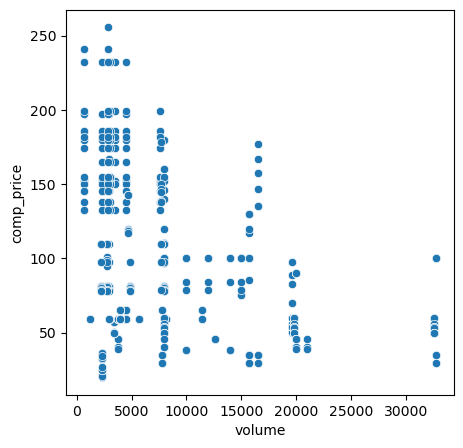

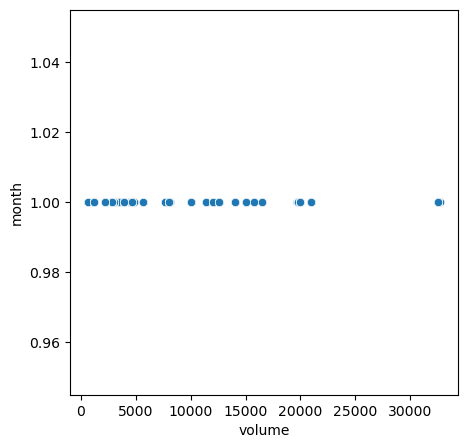

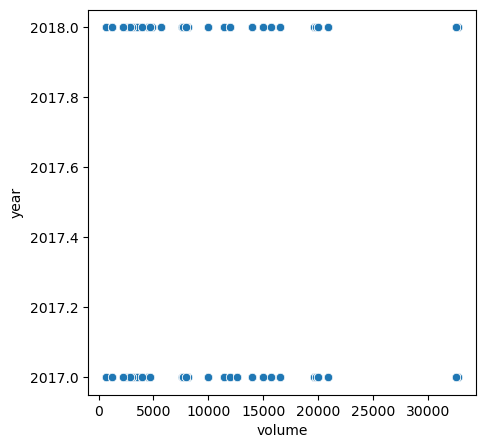

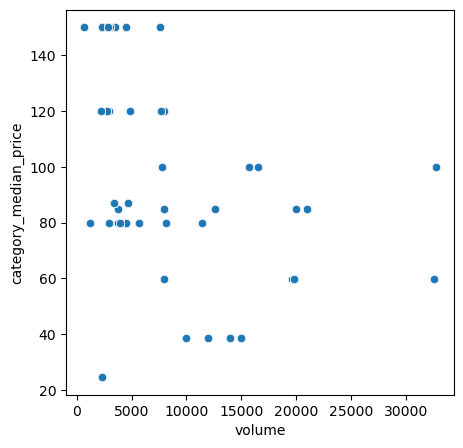

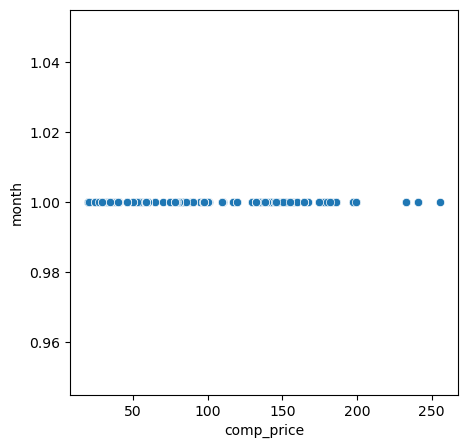

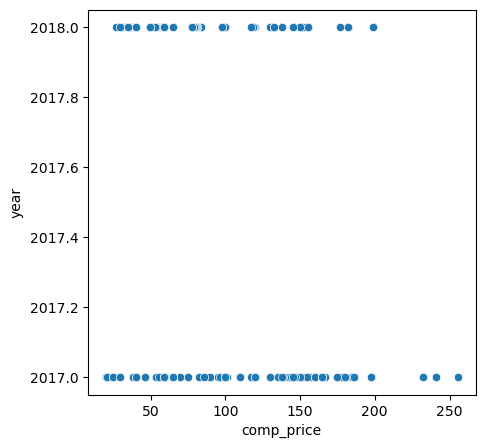

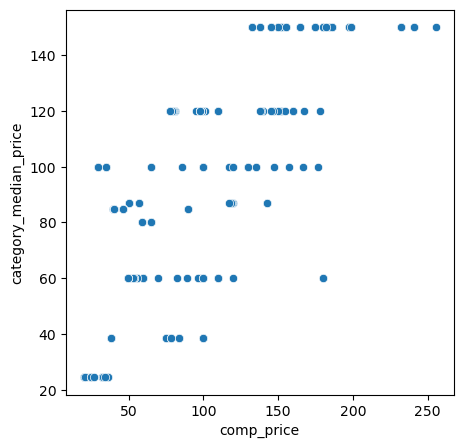

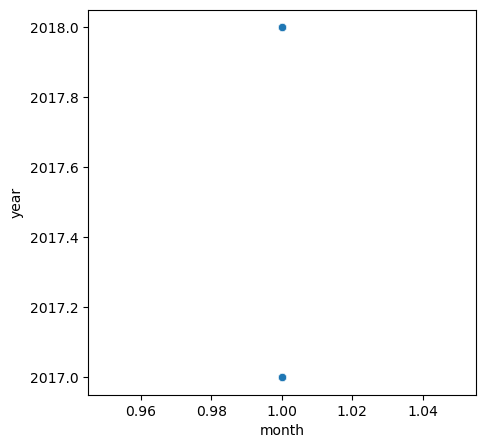

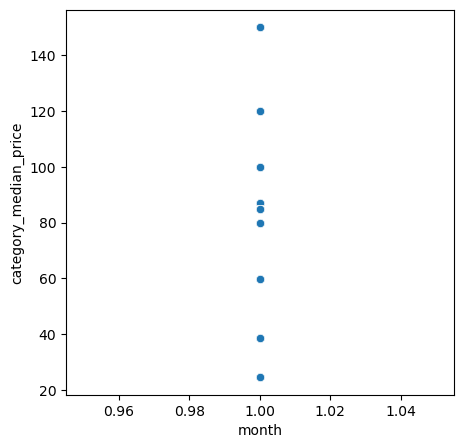

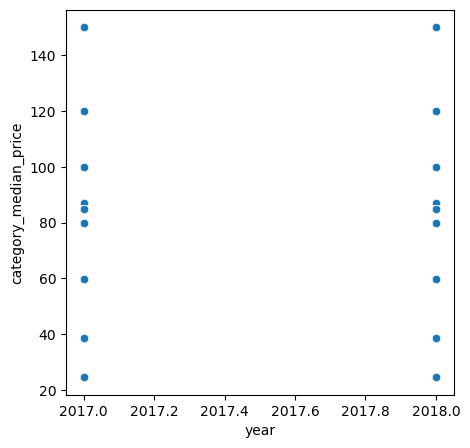

In [76]:
import itertools as it
numeric_cols = df.select_dtypes([int, float]).columns
comb = list(it.combinations(numeric_cols,2))
for i in comb:
    scatter_p(df, i[0], i[1])

13. Сделайте поле lag_price - цена в предыдущем месяце. Если ее нет, оставьте поле пустым. **(2)**

In [77]:
df = df.sort_values(by=['item_id','month_year']).reset_index(drop=True)
df['lag_price'] = df.groupby('item_id')[['unit_price']].shift(1)

In [78]:
df.head(20)

item_id product_category_name month_year  qty  total_price  unit_price  \
0     bed1        bed_bath_table 2017-01-05    1        45.95   45.950000   
1     bed1        bed_bath_table 2017-01-06    3       137.85   45.950000   
2     bed1        bed_bath_table 2017-01-07    6       275.70   45.950000   
3     bed1        bed_bath_table 2017-01-08    4       183.80   45.950000   
4     bed1        bed_bath_table 2017-01-09    2        91.90   45.950000   
5     bed1        bed_bath_table 2017-01-10    3       137.85   45.950000   
6     bed1        bed_bath_table 2017-01-11   11       445.85   40.531818   
7     bed1        bed_bath_table 2017-01-12    6       239.94   39.990000   
8     bed1        bed_bath_table 2018-01-01   19       759.81   39.990000   
9     bed1        bed_bath_table 2018-01-02   18       719.82   39.990000   
10    bed1        bed_bath_table 2018-01-03   17       679.83   39.990000   
11    bed1        bed_bath_table 2018-01-04   13       519.87   39.990000   
12    bed1        bed_bath_table 2018-01-05   19       759.81   39.990000   
13    bed1        bed_bath_table 2018-01-06    5       199.95   39.990000   
14    bed1        bed_bath_table 2018-01-07    8       319.92   39.990000   
15    bed1        bed_bath_table 2018-01-08    8       313.92   39.240000   
16    bed2        bed_bath_table 2017-01-02    2       179.80   89.900000   
17    bed2        bed_bath_table 2017-01-03   22      1977.80   89.900000   
18    bed2        bed_bath_table 2017-01-04   34      3056.60   89.900000   
19    bed2        bed_bath_table 2017-01-05   58      5214.20   89.900000   

    product_name_lenght  product_description_lenght  customers  holiday  \
0                    39                         161         57        1   
1                    39                         161         61        1   
2                    39                         161        123        1   
3                    39                         161         90        1   
4                    39                         161         54        1   
5                    39                         161         50        2   
6                    39                         161         97        4   
7                    39                         161         41        1   
8                    39                         161         62        2   
9                    39                         161         62        2   
10                   39                         161         43        1   
11                   39                         161         34        1   
12                   39                         161         57        3   
13                   39                         161         43        0   
14                   39                         161         26        1   
15                   39                         161         15        1   
16                   54                         245          2        2   
17                   54                         245         20        1   
18                   54                         245         31        2   
19                   54                         245         57        1   

    volume  comp_price  month  year  category_median_price  lag_price  
0     3800   45.950000      1  2017                   84.9        NaN  
1     3800   45.950000      1  2017                   84.9  45.950000  
2     3800   45.950000      1  2017                   84.9  45.950000  
3     3800   45.950000      1  2017                   84.9  45.950000  
4     3800   45.950000      1  2017                   84.9  45.950000  
5     3800   45.950000      1  2017                   84.9  45.950000  
6     3800   40.531818      1  2017                   84.9  45.950000  
7     3800   39.990000      1  2017                   84.9  40.531818  
8     3800   39.990000      1  2018                   84.9  39.990000  
9     3800   39.990000      1  2018                   84.9  39.990000  
10    3800   39.9

14. Создайте поле is_price_up, которое принимает значение 1, если цена выросла по сравнению с предыдущим месяцем. **(2)**

In [79]:
df['is_price_up'] = (df.unit_price > df.lag_price).astype(int)

In [80]:
df.head()

item_id product_category_name month_year  qty  total_price  unit_price  \
0    bed1        bed_bath_table 2017-01-05    1        45.95       45.95   
1    bed1        bed_bath_table 2017-01-06    3       137.85       45.95   
2    bed1        bed_bath_table 2017-01-07    6       275.70       45.95   
3    bed1        bed_bath_table 2017-01-08    4       183.80       45.95   
4    bed1        bed_bath_table 2017-01-09    2        91.90       45.95   

   product_name_lenght  product_description_lenght  customers  holiday  \
0                   39                         161         57        1   
1                   39                         161         61        1   
2                   39                         161        123        1   
3                   39                         161         90        1   
4                   39                         161         54        1   

   volume  comp_price  month  year  category_median_price  lag_price  \
0    3800       45.95      1  2017                   84.9        NaN   
1    3800       45.95      1  2017                   84.9      45.95   
2    3800       45.95      1  2017                   84.9      45.95   
3    3800       45.95      1  2017                   84.9      45.95   
4    3800       45.95      1  2017                   84.9      45.95   

   is_price_up  
0            0  
1            0  
2            0  
3            0  
4            0

15. Постройте тепловую карту корреляций переменных. Сделайте выводы. **(2)**

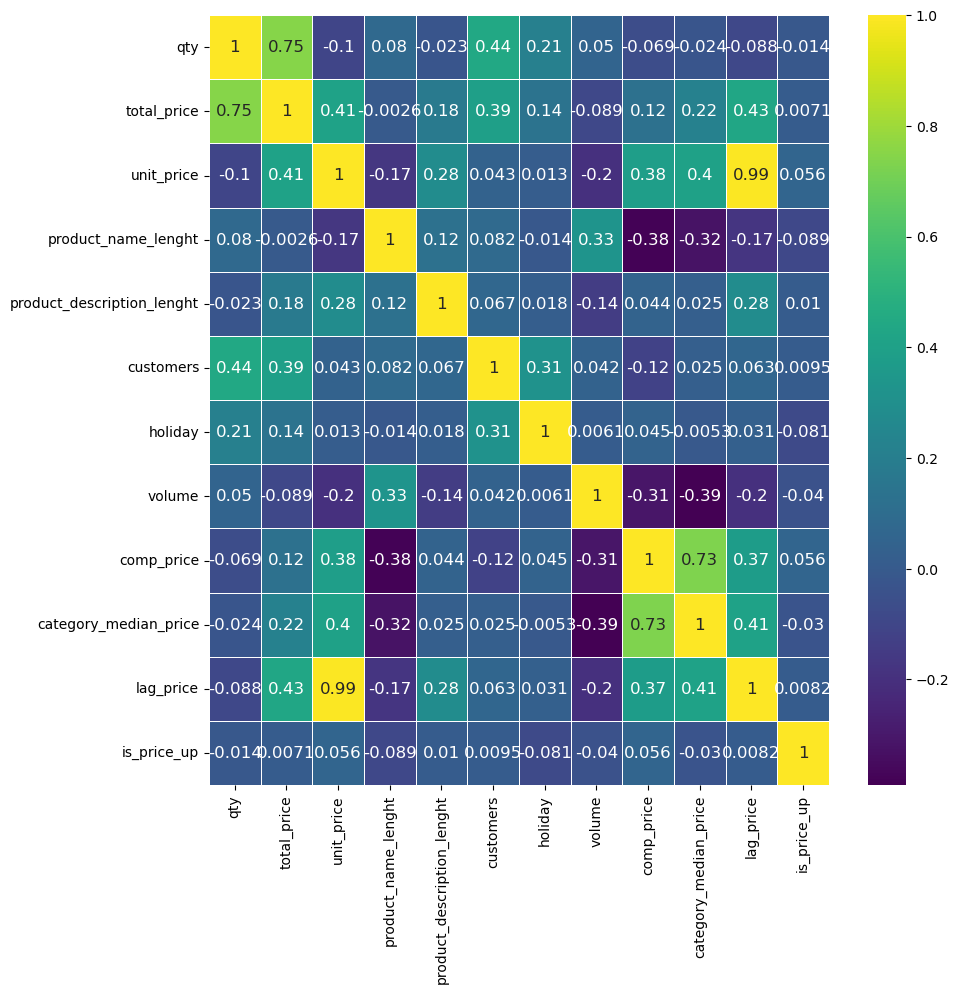

In [81]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.drop(columns=['year', 'month']).corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})
plt.show()

1. Сильная корреляция между `qty` и `total_price` (0.75):

Это логично, так как большее количество проданных товаров (qty) обычно приводит к увеличению общей суммы продаж (total_price).

2. Почти полная корреляция между `unit_price` и `lag_price` (0.99):

Это указывает на то, что цена на товар в предыдущем месяце (`lag_price`) практически идентична текущей цене на единицу товара (`unit_price`). Возможно, цена на товары редко меняется или колеблется незначительно.

3. Умеренная положительная корреляция между `category_median_price` и `comp_price` (0.73):

Это может означать, что медианная цена в категории товаров имеет тенденцию зависеть от цен конкурентов. Если конкуренты повышают или понижают цену, медианная цена в категории товаров также изменяется.

4. Корреляция между `customers` и `qty` (0.44):

Количество покупателей (`customers`) имеет умеренную положительную корреляцию с количеством проданных товаров (`qty`), что вполне ожидаемо: чем больше покупателей, тем больше продано товаров.

5. Негативная корреляция между `unit_price` и `product_description_length` (-0.38):

Это может указывать на то, что товары с более высокой ценой имеют более короткие описания, что может быть характерно для премиум-продуктов, которые не нуждаются в детальном описании.

6. Негативная корреляция между `comp_price` и `volume` (-0.31):

Понижение объёма продаж может быть связано с увеличением цен у конкурентов. Это может свидетельствовать о чувствительности продаж к ценам конкурентов.

7. Положительная корреляция между `holiday` и `customers` (0.31):

Это может говорить о том, что в праздничные периоды число покупателей увеличивается, что вполне объяснимо, так как праздничные акции часто привлекают больше покупателей.

8. Корреляция между `category_median_price` и `unit_price` (0.4):

Медианная цена в категории товаров связана с ценой на единицу товара. Это говорит о том, что товары внутри одной категории имеют тенденцию быть ближе по стоимости.

16. Постройте таблицу, где по столбцам название товаров, а по строкам - дата (месяц-год). В ячейках должно быть количество проданного товара. **(3)**

In [82]:
pt = pd.pivot_table(data = df, index='month_year', columns='item_id', values='qty')
pt

item_id     bed1  bed2  bed3  bed4  bed5  computers1  computers2  computers3  \
month_year                                                                     
2017-01-01   NaN   NaN   NaN   NaN   NaN         NaN         NaN         NaN   
2017-01-02   NaN   2.0   NaN   NaN   NaN         NaN         NaN         NaN   
2017-01-03   NaN  22.0   NaN   NaN   NaN         NaN         NaN         NaN   
2017-01-04   NaN  34.0   NaN   NaN   NaN         NaN         NaN         NaN   
2017-01-05   1.0  58.0   NaN   NaN   1.0         4.0         NaN        15.0   
2017-01-06   3.0  51.0   NaN   NaN  10.0         6.0         NaN        15.0   
2017-01-07   6.0  60.0   NaN   NaN  59.0        10.0         NaN         4.0   
2017-01-08   4.0  37.0   NaN   NaN  52.0         2.0         NaN        13.0   
2017-01-09   2.0  23.0   NaN   NaN  32.0         4.0         NaN        12.0   
2017-01-10   3.0  14.0   8.0  29.0   NaN         4.0         NaN        16.0   
2017-01-11  11.0  40.0  22.0  32.0   NaN         6.0         1.0        18.0   
2017-01-12   6.0  18.0   7.0  12.0   NaN         1.0        12.0         2.0   
2018-01-01  19.0  17.0  11.0  19.0   NaN        31.0        29.0         5.0   
2018-01-02  18.0  22.0  13.0  16.0   NaN        30.0        71.0         3.0   
2018-01-03  17.0  17.0   3.0   8.0   NaN        13.0        27.0         NaN   
2018-01-04  13.0   6.0   9.0   7.0   NaN         5.0        13.0         NaN   
2018-01-05  19.0  26.0  14.0   2.0   NaN         NaN        11.0         NaN   
2018-01-06   5.0  23.0  14.0   4.0   NaN         4.0        10.0         NaN   
2018-01-07   8.0  10.0   9.0   2.0   NaN        18.0         7.0         NaN   
2018-01-08   8.0   7.0   1.0   NaN   NaN         1.0         2.0         NaN   

item_id     computers4  computers5  ...  perfumery1  perfumery2  watches1  \
month_year                          ...                                     
2017-01-01         NaN         NaN  ...         NaN         NaN       NaN   
2017-01-02         3.0         NaN  ...         NaN         NaN       NaN   
2017-01-03         3.0         NaN  ...         NaN         NaN       5.0   
2017-01-04         5.0         NaN  ...         NaN         NaN       3.0   
2017-01-05         NaN         NaN  ...         NaN         NaN       NaN   
2017-01-06         3.0         NaN  ...         4.0         NaN       5.0   
2017-01-07         6.0         NaN  ...         7.0         NaN      10.0   
2017-01-08         7.0         NaN  ...         7.0         1.0      15.0   
2017-01-09        11.0         NaN  ...        17.0         1.0      20.0   
2017-01-10        17.0         1.0  ...        17.0         2.0       4.0   
2017-01-11        18.0         NaN  ...        20.0         8.0      18.0   
2017-01-12        23.0         2.0  ...        24.0        12.0       5.0   
2018-01-01        43.0        57.0  ...        10.0         6.0       2.0   
2018-01-02        31.0        45.0  ...         4.0        11.0       6.0   
2018-01-03        44.0         6.0  ...        14.0         4.0      32.0   
2018-01-04        56.0        10.0  ...         2.0         8.0       9.0   
2018-01-05        25.0         NaN  ...         NaN        17.0      32.0   
2018-01-06        27.0         3.0  ...         NaN        14.0      15.0   
2018-01-07         9.0         3.0  ...         8.0         5.0       2.0   
2018-01-08        10.0         NaN  ...         4.0        17.0      11.0   

item_id     watches2  watches3  watches4  watches5  watches6  watches7  \
month_year                                                               
2017-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-03       NaN       1.0       NaN       NaN       NaN       NaN   
2017-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-05       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-06       5.0      

17. Продажи каких товаров коррелируют между собой? **(3)**

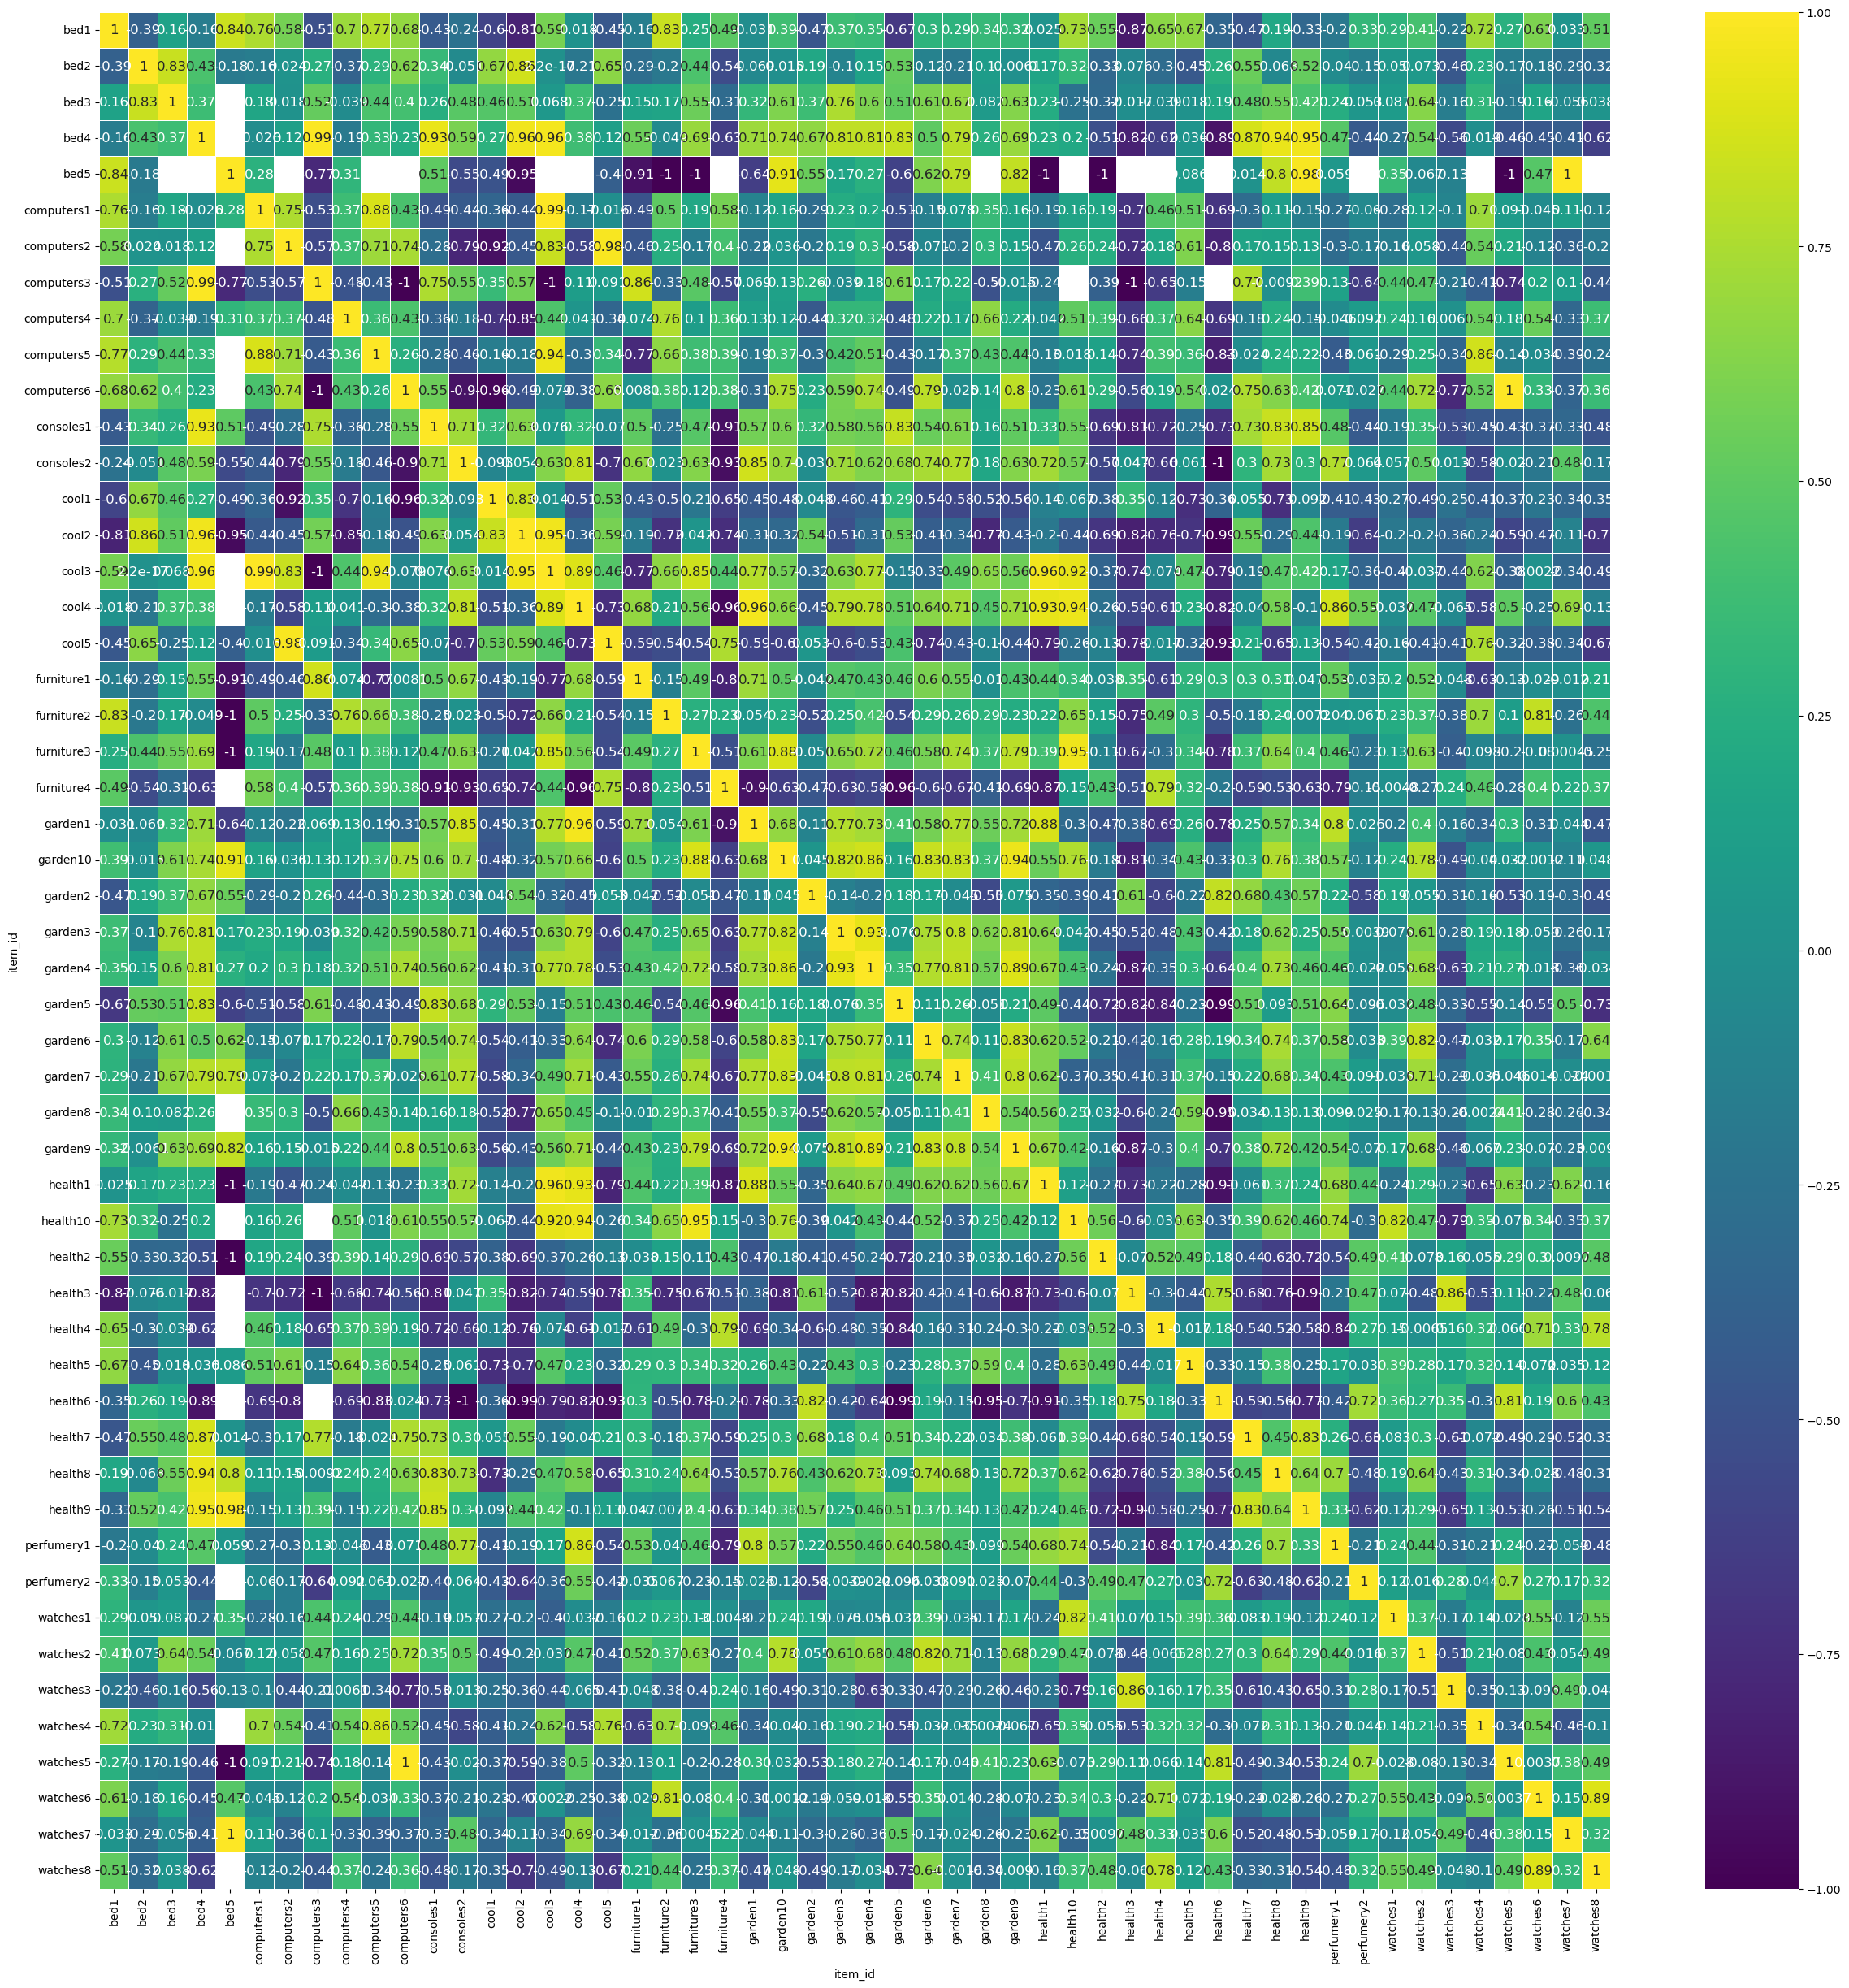

In [83]:
fig , ax = plt.subplots(figsize = (30,30))

sns.heatmap(pt.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})
plt.show()

Как можно заметить график просто огромный, что глаза просто разбегаются. Имеется довольно много товаров, продажи которых коррелируют друг с другом. Предоложим, что нам нужны товары с положительной корреляцией больше, чем 0.8.

In [84]:
c = pt.corr()

In [85]:
corr_matrix_no_repeat = c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
unique_correlations = corr_matrix_no_repeat.unstack().dropna().sort_values(ascending=False)
unique_correlations = unique_correlations[unique_correlations > 0.8]

In [86]:
print(unique_correlations[:10])

item_id     item_id   
watches7    bed5          1.000000
watches5    computers6    0.996626
cool3       computers1    0.994900
computers3  bed4          0.986408
cool5       computers2    0.977640
health9     bed5          0.976926
garden1     cool4         0.963540
cool3       bed4          0.961430
health1     cool3         0.956399
cool2       bed4          0.955894
dtype: float64


18. Попробуйте ответить на какой-нибудь вопрос по данным, не заданный ранее. Никак не ограничиваем вашу фантазию **(3)**

Товары какой категории в среднем преобретаются в большем количестве?

In [87]:
res = df.groupby('product_category_name')[['qty']].mean()
res

qty
product_category_name           
bed_bath_table         16.819672
computers_accessories  16.913043
consoles_games         10.863636
cool_stuff              9.789474
furniture_decor        18.625000
garden_tools           14.987500
health_beauty          14.169231
perfumery               9.384615
watches_gifts          13.893204

### Задача 4. Построение модели / dash (15 баллов)

Постройте модель линейной регрессии для предсказания переменной qty.

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


1. Подобные данные не совсем правильно делить случайным образом. Оставьте на тест наблюдения с 01.06.2018. Вся история до этого будет обучающей выборкой. Создайте датасеты train и test. **(1 балл)**

In [89]:
train = df[df.month_year < '2018-01-06']
test = df[df.month_year >= '2018-01-06']

In [90]:
train

item_id product_category_name month_year  qty  total_price  unit_price  \
0        bed1        bed_bath_table 2017-01-05    1        45.95   45.950000   
1        bed1        bed_bath_table 2017-01-06    3       137.85   45.950000   
2        bed1        bed_bath_table 2017-01-07    6       275.70   45.950000   
3        bed1        bed_bath_table 2017-01-08    4       183.80   45.950000   
4        bed1        bed_bath_table 2017-01-09    2        91.90   45.950000   
..        ...                   ...        ...  ...          ...         ...   
668  watches8         watches_gifts 2018-01-01    2       459.80  229.900000   
669  watches8         watches_gifts 2018-01-02   11      2250.80  204.618182   
670  watches8         watches_gifts 2018-01-03   16      2680.00  167.500000   
671  watches8         watches_gifts 2018-01-04   26      3908.90  150.342308   
672  watches8         watches_gifts 2018-01-05   30      4355.00  145.166667   

     product_name_lenght  product_description_lenght  customers  holiday  \
0                     39                         161         57        1   
1                     39                         161         61        1   
2                     39                         161        123        1   
3                     39                         161         90        1   
4                     39                         161         54        1   
..                   ...                         ...        ...      ...   
668                   35                         640         59        2   
669                   35                         640         90        2   
670                   35                         640        125        1   
671                   35                         640        178        1   
672                   35                         640        260        3   

     volume  comp_price  month  year  category_median_price   lag_price  \
0      3800   45.950000      1  2017              84.900000         NaN   
1      3800   45.950000      1  2017              84.900000   45.950000   
2      3800   45.950000      1  2017              84.900000   45.950000   
3      3800   45.950000      1  2017              84.900000   45.950000   
4      3800   45.950000      1  2017              84.900000   45.950000   
..      ...         ...    ...   ...                    ...         ...   
668    2992  199.000000      1  2018             150.133333  239.900000   
669    2992  182.000000      1  2018             150.133333  229.900000   
670    2992  151.878437      1  2018             150.133333  204.618182   
671    2992  150.133333      1  2018             150.133333  167.500000   
672    2992  132.531250      1  2018             150.133333  150.342308   

     is_price_up  
0              0  
1              0  
2              0  
3              0  
4              0  
..           ...  
668            0  
669            0  
670            0  
671            0  
672            0  

[556 rows x 17 columns]

2. Обучите линейную регрессию из sklearn на всех числовых переменных. Не забудьте удалить переменные customers, total_price и саму переменную qty.**(3 балла)** Посчитайте значение метрик MSE, RMSE на обучающей и тестовой выборке. **(2 балла)**

In [91]:
X_train = train.select_dtypes(include=[np.number]).drop(columns=['qty', 'customers', 'total_price', 'lag_price'])
y_train = train['qty']
X_test = test.select_dtypes(include=[np.number]).drop(columns=['qty', 'customers', 'total_price', 'lag_price'])
y_test = test['qty']

In [92]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [93]:
lr.coef_

array([-2.64231395e-02,  6.71971998e-02, -4.61157573e-04,  3.35971992e+00,
        9.55752571e-05, -2.59832051e-02,  3.10862447e-15,  3.51388362e+00,
        4.23002198e-02,  9.02008017e-01])

In [94]:
train_pred = lr.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, train_pred)}')
print(f'MSE: {np.sqrt(mean_squared_error(y_train, train_pred))}')
print(f'R^2: {r2_score(y_train, train_pred)}')

MSE: 244.7369380263916
MSE: 15.644070379105036
R^2: 0.07971198739816365


In [95]:
test_pred = lr.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, test_pred)}')
print(f'MSE: {np.sqrt(mean_squared_error(y_test, test_pred))}')
print(f'R^2: {r2_score(y_test, test_pred)}')#Все очень плохо

MSE: 122.44957768665448
MSE: 11.065693728214896
R^2: -0.3943289114124455


3. Закодируйте переменную product_category_name методом one-hot-encoding. **(3 балла)** Обучите модель еще раз, посчитайте метрики. **(1 балл)**

In [96]:
df1 = pd.get_dummies(df, columns=['product_category_name'])

In [97]:
train = df1[df1.month_year < '2018-01-06']
test = df1[df1.month_year >= '2018-01-06']
X_train = train.select_dtypes(include=[np.number]).drop(columns=['qty', 'customers', 'total_price', 'lag_price'])
y_train = train['qty']
X_test = test.select_dtypes(include=[np.number]).drop(columns=['qty', 'customers', 'total_price', 'lag_price'])
y_test = test['qty']

In [98]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [99]:
lr2.coef_

array([-2.75703881e-02,  2.82833007e-02,  5.72881354e-04,  3.25284883e+00,
        2.10111557e-04, -7.83603220e-02, -4.44089210e-16,  2.14426320e+00,
        9.53313898e-02,  2.15624753e+00, -9.28004071e-02,  3.79052639e+00,
       -3.02386084e+00, -7.49064612e+00,  9.18512899e+00, -6.65063269e-01,
       -5.89911107e-01, -4.39491876e+00,  3.28154513e+00])

In [100]:
train_pred = lr2.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, train_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, train_pred))}')
print(f'R^2: {r2_score(y_train, train_pred)}')

MSE: 233.51642088942273
RMSE: 15.281244088405327
R^2: 0.12190466783135767


In [101]:
test_pred = lr2.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, test_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, test_pred))}')
print(f'R^2: {r2_score(y_test, test_pred)}') #Все очень плохо2

MSE: 138.95716806576493
RMSE: 11.788009503973303
R^2: -0.5823002458848894


4. **(5 баллов)**
Выберите один из вариантов задания.

**Вариант 1 (улучшаем модель)**

Попробуйте увеличить точность модели любым способом (но использовать другие модели, кроме линейной регрессии, запрещается). Можно:
- исправлять ошибки в данных, если вы их найдете
- удалять выбросы
- удалять нерелевантные признаки
- генерировать новые признаки
- нормализовывать данные
- делать признаки из "лагов" продаж, например, использовать в качестве признака продажи три месяца назад. Обратите внимание, что при этом надо избегать data leak. Т.к. вам нужно предсказать продажи с 01.06.2018, считайте, что сейчас 31.05.2018, и продаж после этой даты вы не знаете.
- ...


Напишите развернутые комментарии к экспериментам.
Сделайте выводы.

**Вариант 2 (dash)**


С помощью библиотеки dash постройте интерактивный график, где по оси X - дата, по оси Y - количество проданных штук.
Сделайте фильтры:
- по категориям
- по товарам
- по цене (пользователь может вводить минимум и максимум)

Можете выбрать другой график и другие фильтры.

При наведении на точку должна показываться информация о всех полях из датасета.


In [102]:
#выбран вариант 1
lb, ub = bounds(df1, 'qty')
df1 = df1[(df1.qty > lb)&(df1.qty < ub)]
train = df1[df1.month_year < '2018-01-06']
test = df1[df1.month_year >= '2018-01-06']
X_train = train.select_dtypes(include=[np.number]).drop(columns=['qty', 'customers', 'total_price', 'lag_price'])
y_train = train['qty']
X_test = test.select_dtypes(include=[np.number]).drop(columns=['qty', 'customers', 'total_price', 'lag_price'])
y_test = test['qty']

In [103]:
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

LinearRegression()

In [104]:
lr3.coef_

array([-2.38316111e-02,  3.38075604e-03,  1.21714104e-03,  1.90029488e+00,
        1.53019724e-04, -4.13351937e-02,  4.44089210e-16,  3.13548199e-01,
        6.63938446e-02,  2.25192655e+00,  5.14800035e-01,  3.51191070e-01,
        1.10789560e+00, -4.79185726e+00,  5.61159850e-01, -1.04249347e+00,
        2.63299743e+00, -1.52668077e+00,  2.19298750e+00])

In [105]:
train_pred = lr3.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, train_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_train, train_pred))}')
print(f'R^2: {r2_score(y_train, train_pred)}')

MSE: 70.14863937499759
RMSE: 8.375478456482208
R^2: 0.12528219451746192


In [106]:
test_pred = lr3.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, test_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, test_pred))}')
print(f'R^2: {r2_score(y_test, test_pred)}') #Все очень плохо3

MSE: 64.02760260598546
RMSE: 8.001724976902509
R^2: -0.1571662742531159


В своем эксперементе я просто удалил выбросы из целевой переменной взяв верхнюю и нижнюю границы с помощью интерквантильного размаха (Имеется функция выше, которую я также применял в другом задании). Таким образом, я смог хоть и немного улучшить метрики (Правда не сам R^2 в тренировочной выборке). R^2, к сожалению, довольно мал на выборке `train` и отрицателен на выборке `test`. Однако данный результат почти предсказуем, т.к. переменные не имеют линейной зависимости с целевой переменной исходя из графического анализа. Возможно есть вариант привести переменные к линейной зависимости, но на мой взгляд тут бы больше подошла другая модель для улучшения результатов.

### Git (5 баллов)

Внезапная коллаборация с курсом Инструменты разработки!

**Сдайте ДЗ в git clasroom до мягкого дедлайна.** Ссылка на задание - https://classroom.github.com/a/pdYJ_rdp

Перейдите по ней со своего github аккаунта и выберите себя в списке студентов. Если Вас нет в списке, напишите преподавателю.

Прикрепите ipynb файл в репозиторий.

Вы можете прикрепить ДЗ в anytask, как обычно. В этом случае максимальная оценка за ДЗ - 95 баллов.